## 배럴 도출을 위한 kbreport데이터 크롤링

In [829]:
from selenium.webdriver.common.keys import Keys
import time
import pandas as pd
from selenium import webdriver
from selenium import webdriver
driver = webdriver.Chrome('C:/Users/evbf/Desktop/파이썬 연습/chromedriver_win32 (3)/chromedriver.exe' )

xpath='https://www.koreabaseball.com/TeamRank/TeamRank.aspx'
driver.get(xpath)

In [830]:
#가져올 년도 지정
year1 = [2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000,2000,1999,1999,1998,1997,1996,1995,1994,1993,1992,1991,1990,1989,1988,1987,1986,1985,1984,1983,1982]

In [831]:
aa=[]
for page in range (1,41):
    driver.find_element_by_xpath('//*[@id="cphContents_cphContents_cphContents_ddlYear"]/option['+str(page)+']').click()
    time.sleep(3)
    try:
        k1= driver.find_element_by_xpath('//*[@id="cphContents_cphContents_cphContents_pnlMagicLeague"]/table')
        temp_list = [x.split(' ') for x in k1.text.split('\n')]
        aa.append(temp_list)
        k2= driver.find_element_by_xpath('//*[@id="cphContents_cphContents_cphContents_udpRecord"]/table')
        temp_list = [x.split(' ') for x in k2.text.split('\n')]
        aa.append(temp_list)
        
    except:
        time.sleep(3)
        k1= driver.find_element_by_xpath('//*[@id="cphContents_cphContents_cphContents_udpRecord"]/table')
        temp_list = [x.split(' ') for x in k1.text.split('\n')]
        aa.append(temp_list)

In [832]:
for i in range(0,22):
    for j in range(len(aa[i])):
        aa[i][j].append(year1[i])
    
for i in range(21,23):
    for j in range(len(aa[i])):
        aa[i][j].append(2000)
        
for i in range(23,25):
    for j in range(len(aa[i])):
        aa[i][j].append(1999)
        
for i in range(25,42):
    for j in range(len(aa[i])):
        aa[i][j].append(year1[i])

In [833]:
aaaaa=pd.DataFrame()

for i in range(len(aa)):
    aaa = pd.DataFrame(aa[i])
    aaaaa = pd.concat([aaa, aaaaa], axis = 0)
    
aaaaa.reset_index(inplace=True)
d=aaaaa[aaaaa["index"]==0].index
aaaaa.drop(d,inplace=True) 

# aaaaa.to_excel(excel_writer='C:/Users/evbf/Desktop/kboreport.xlsx')

## 데이터셋 생성

In [834]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumGothic'

#오류 무시
import warnings
warnings.filterwarnings('ignore')

In [835]:
hts_2018 = pd.read_csv('./01_제공데이터/2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_HTS_2018.csv', encoding='euc-kr')
hts_2019 = pd.read_csv('./01_제공데이터/2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_HTS_2019.csv', encoding='euc-kr')
hts_2020 = pd.read_csv('./01_제공데이터/2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_HTS_2020.csv', encoding='euc-kr')
hts_2021 = pd.read_csv('./01_제공데이터/2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_HTS_2021.csv', encoding='euc-kr')

schedule_2021 = pd.read_csv('./01_제공데이터/2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_경기일정_2021.csv', encoding='euc-kr')

player_2018 = pd.read_csv('./01_제공데이터/2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_선수_2018.csv', encoding='euc-kr')
player_2019 = pd.read_csv('./01_제공데이터/2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_선수_2019.csv', encoding='euc-kr')
player_2020 = pd.read_csv('./01_제공데이터/2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_선수_2020.csv', encoding='euc-kr')
player_2021 = pd.read_csv('./01_제공데이터/2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_선수_2021.csv', encoding='euc-kr')

hitter_2018 = pd.read_csv('./01_제공데이터/2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_타자 기본_2018.csv', encoding='euc-kr')
hitter_2019 = pd.read_csv('./01_제공데이터/2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_타자 기본_2019.csv', encoding='euc-kr')
hitter_2020 = pd.read_csv('./01_제공데이터/2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_타자 기본_2020.csv', encoding='euc-kr')
hitter_2021 = pd.read_csv('./01_제공데이터/2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_타자 기본_2021.csv', encoding='euc-kr')

team = pd.read_csv('./01_제공데이터/2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_팀.csv', encoding='euc-kr')

In [836]:
# 기존 데이터셋 병합
hts = pd.concat([hts_2018, hts_2019, hts_2020, hts_2021], axis=0)
player = pd.concat([player_2018, player_2019, player_2020, player_2021], axis=0)
hitter = pd.concat([hitter_2018, hitter_2019, hitter_2020], axis=0)

추가적으로 불러올 데이터(statiz에서 가져온 외부데이터)

In [837]:
# wrc+등을 포함한 데이터
all_2018 = pd.read_csv('./04_외부데이터/all_2018_210816.csv', encoding='euc-kr')
all_2019 = pd.read_csv('./04_외부데이터/all_2019_210816.csv', encoding='euc-kr')
all_2020 = pd.read_csv('./04_외부데이터/all_2020_210816.csv', encoding='euc-kr')
all_2021 = pd.read_csv('./04_외부데이터/all_2021_210816.csv', encoding='euc-kr')

# wRAA 등 기타 지표를 포함한 데이터
statiz_2018 = pd.read_csv('./04_외부데이터/statiz2018_210816.csv', encoding='euc-kr')
statiz_2019 = pd.read_csv('./04_외부데이터/statiz2019_210816.csv', encoding='euc-kr')
statiz_2020 = pd.read_csv('./04_외부데이터/statiz2020_210816.csv', encoding='euc-kr')
statiz_2021 = pd.read_csv('./04_외부데이터/statiz2021_210816.csv', encoding='euc-kr')

In [838]:
# 결측치 9999로 처리
all_2018.fillna(9999, inplace=True)
all_2019.fillna(9999, inplace=True)
all_2020.fillna(9999, inplace=True)
all_2021.fillna(9999, inplace=True)

statiz_2018.fillna(9999, inplace=True)
statiz_2019.fillna(9999, inplace=True)
statiz_2020.fillna(9999, inplace=True)
statiz_2021.fillna(9999, inplace=True)

In [839]:
#중복행 제거
all_2018.drop_duplicates(inplace=True)
all_2019.drop_duplicates(inplace=True)
all_2020.drop_duplicates(inplace=True)
all_2021.drop_duplicates(inplace=True)

statiz_2018.drop_duplicates(inplace=True)
statiz_2019.drop_duplicates(inplace=True)
statiz_2020.drop_duplicates(inplace=True)
statiz_2021.drop_duplicates(inplace=True)

In [840]:
#인덱스 초기화
all_2018.reset_index(drop = True, inplace = True)
all_2019.reset_index(drop = True, inplace = True)
all_2020.reset_index(drop = True, inplace = True)
all_2021.reset_index(drop = True, inplace = True)

statiz_2018.reset_index(drop = True, inplace = True)
statiz_2019.reset_index(drop = True, inplace = True)
statiz_2020.reset_index(drop = True, inplace = True)
statiz_2021.reset_index(drop = True, inplace = True)

### 외부데이터 merge

In [841]:
merge_2018 = pd.merge(all_2018, statiz_2018, on=['이름', '팀'])
merge_2019 = pd.merge(all_2019, statiz_2019, on=['이름', '팀'])
merge_2020 = pd.merge(all_2020, statiz_2020, on=['이름', '팀'])
merge_2021 = pd.merge(all_2021, statiz_2021, on=['이름', '팀'])

In [842]:
#GYEAR 칼럼 생성
merge_2018['GYEAR'] = 2018
merge_2019['GYEAR'] = 2019
merge_2020['GYEAR'] = 2020
merge_2021['GYEAR'] = 2021

In [843]:
#2021년 데이터와 분리
newdata = pd.concat([merge_2018, merge_2019, merge_2020], axis=0)
newdata

,순_x,이름,팀,정렬,G,타석_x,타수,득점,안타,2타,3타,홈런,루타,타점,도루,도실,볼넷,사구,고4,삼진,병살,희타,희비,타율,출루,장타,OPS,wOBA_x,wRC+_x,WAR*,WPA,순_y,생산력+,타석_y,HR%,BB%,K%,BB/K,IsoP,IsoD,BABIP,Spd,PSN,wOBA_y,wRC,wRC/27,wRAA,wOBA.1,wRC.1,wRC/27.1,wRAA.1,wRC+_y,GYEAR
0,1.0,김재환,18두LF,6.94,139,602,527,104,176,36,1,44,346,133,2,0,59,9,4,134,6,0,7,0.334,0.405,0.657,1.062,0.438,168.8,6.94,5.80,7.0,168.8,602,7.31,9.8,22.3,0.44,0.323,0.071,0.371,3.5,3.83,0.438,134.7,9.99,50.2,0.452,142.7,10.59,58.2,168.8,2018
1,2.0,박병호,18넥1B,6.62,113,488,400,88,138,20,0,43,287,112,0,1,68,17,10,114,9,0,3,0.345,0.457,0.718,1.175,0.478,190.9,6.62,6.44,3.0,190.9,488,8.81,13.9,23.4,0.60,0.373,0.112,0.386,1.7,0.00,0.478,127.4,12.50,58.8,0.486,130.9,12.85,62.3,190.9,2018
2,3.0,양의지,18두C,6.42,133,503,439,84,157,29,1,23,257,77,6,0,45,13,6,40,13,0,6,0.358,0.427,0.585,1.013,0.431,160.5,6.42,3.91,9.0,160.5,503,4.57,9.0,8.0,1.13,0.228,0.070,0.351,3.9,9.52,0.431,109.0,9.78,38.4,0.440,113.4,10.17,42.7,160.5,2018
3,4.0,전준우,18롯LF,5.67,144,614,556,118,190,36,2,33,329,90,7,7,48,7,1,82,12,1,2,0.342,0.400,0.592,0.991,0.421,146.3,5.67,5.45,14.0,146.3,614,5.38,7.8,13.4,0.59,0.250,0.058,0.354,4.1,11.55,0.421,127.4,8.87,41.2,0.418,126.2,8.78,39.9,146.3,2018
4,5.0,로하스,18KCF,5.66,144,645,564,114,172,30,1,43,333,114,18,13,71,7,4,142,10,1,2,0.305,0.388,0.590,0.979,0.410,138.5,5.66,5.41,20.0,138.5,645,6.67,11.0,22.0,0.50,0.286,0.083,0.339,4.2,25.38,0.410,127.3,8.22,36.7,0.407,125.5,8.11,34.9,138.5,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342,369.0,이성열,20한DH,-0.93,79,248,227,23,46,5,0,8,75,34,1,1,16,5,0,69,4,0,0,0.203,0.270,0.330,0.601,0.277,57.5,-0.93,-1.13,181.0,57.5,248,3.23,6.5,27.8,0.23,0.128,0.068,0.253,2.5,1.78,0.277,18.4,2.67,-14.2,0.279,18.7,2.72,-13.8,57.5,2020
343,370.0,김규성,20K2B,-1.01,103,182,157,21,28,2,1,3,41,11,2,1,13,1,0,40,1,11,0,0.178,0.246,0.261,0.507,0.226,21.0,-1.01,-1.85,238.0,21.0,182,1.65,7.1,22.0,0.33,0.083,0.067,0.219,5.6,2.40,0.226,5.4,1.02,-18.5,0.223,5.0,0.95,-18.9,21.0,2020
344,371.0,김태진,20NK3B,-1.03,82,280,263,28,62,5,1,1,72,23,7,4,13,1,0,45,2,2,1,0.236,0.273,0.274,0.547,0.258,41.9,-1.03,-0.57,212.0,41.9,280,0.36,4.6,16.1,0.29,0.038,0.038,0.280,5.1,1.75,0.258,15.9,2.05,-20.8,0.255,15.4,1.98,-21.4,41.9,2020
345,372.0,박찬호,20KSS,-1.15,141,530,479,63,106,16,0,3,131,36,15,8,36,0,0,87,14,12,3,0.221,0.274,0.273,0.548,0.254,39.9,-1.15,-1.96,214.0,39.9,530,0.57,6.8,16.4,0.41,0.052,0.053,0.263,4.4,5.00,0.254,28.8,1.90,-40.8,0.252,27.8,1.83,-41.8,39.9,2020


In [844]:
newdata_1 = newdata[['GYEAR', '이름', '타석_x', '출루', 'OPS', 'wRC+_x', 'WAR*', 'WPA', 'BABIP', 'wOBA_y', 'wRC',
                    'wRC/27', 'wRAA', 'wOBA.1', 'wRC.1', 'wRC/27.1', 'wRAA.1']]
newdata_1.rename(columns = {'타석_x' : '타석', 'wOBA_y' : 'wOBA', 'wRC+_x' : 'wRC+', 'WAR*' : 'WAR', 'wOBA.1' : 'wOBA_p',
                           'wRC.1' : 'wRC_p', 'wRC/27.1' : 'wRC/27_p', 'wRAA.1' : 'wRAA_p', 'wOBA_y' : 'wOBA', 'G' : 'GAMENUM',
                           '출루' : '출루율'}, inplace = True)

In [845]:
newdata_1

,GYEAR,이름,타석,출루율,OPS,wRC+,WAR,WPA,BABIP,wOBA,wRC,wRC/27,wRAA,wOBA_p,wRC_p,wRC/27_p,wRAA_p
0,2018,김재환,602,0.405,1.062,168.8,6.94,5.80,0.371,0.438,134.7,9.99,50.2,0.452,142.7,10.59,58.2
1,2018,박병호,488,0.457,1.175,190.9,6.62,6.44,0.386,0.478,127.4,12.50,58.8,0.486,130.9,12.85,62.3
2,2018,양의지,503,0.427,1.013,160.5,6.42,3.91,0.351,0.431,109.0,9.78,38.4,0.440,113.4,10.17,42.7
3,2018,전준우,614,0.400,0.991,146.3,5.67,5.45,0.354,0.421,127.4,8.87,41.2,0.418,126.2,8.78,39.9
4,2018,로하스,645,0.388,0.979,138.5,5.66,5.41,0.339,0.410,127.3,8.22,36.7,0.407,125.5,8.11,34.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342,2020,이성열,248,0.270,0.601,57.5,-0.93,-1.13,0.253,0.277,18.4,2.67,-14.2,0.279,18.7,2.72,-13.8
343,2020,김규성,182,0.246,0.507,21.0,-1.01,-1.85,0.219,0.226,5.4,1.02,-18.5,0.223,5.0,0.95,-18.9
344,2020,김태진,280,0.273,0.547,41.9,-1.03,-0.57,0.280,0.258,15.9,2.05,-20.8,0.255,15.4,1.98,-21.4
345,2020,박찬호,530,0.274,0.548,39.9,-1.15,-1.96,0.263,0.254,28.8,1.90,-40.8,0.252,27.8,1.83,-41.8


In [846]:
newdata_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 986 entries, 0 to 346
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   GYEAR     986 non-null    int64  
 1   이름        986 non-null    object 
 2   타석        986 non-null    int64  
 3   출루율       986 non-null    float64
 4   OPS       986 non-null    float64
 5   wRC+      986 non-null    float64
 6   WAR       986 non-null    float64
 7   WPA       986 non-null    float64
 8   BABIP     986 non-null    float64
 9   wOBA      986 non-null    float64
 10  wRC       986 non-null    float64
 11  wRC/27    986 non-null    float64
 12  wRAA      986 non-null    float64
 13  wOBA_p    986 non-null    float64
 14  wRC_p     986 non-null    float64
 15  wRC/27_p  986 non-null    float64
 16  wRAA_p    986 non-null    float64
dtypes: float64(14), int64(2), object(1)
memory usage: 138.7+ KB


In [847]:
newdata_2 = merge_2021[['GYEAR', '이름', 'G', '타석_x', '타수', '타율', '안타', '홈런', '루타', '장타', '희비', '볼넷', '삼진', 
                        '고4', '사구', '병살', '출루', 'OPS', 'wRC+_x', 'WAR*', 'WPA', 'BABIP', 'wOBA_y', 'wRC',
                    'wRC/27', 'wRAA', 'wOBA.1', 'wRC.1', 'wRC/27.1', 'wRAA.1']]
newdata_2.rename(columns = {'타석_x' : '타석', 'wOBA_x' : 'wOBA', 'wRC+_x' : 'wRC+', 'WAR*' : 'WAR', 'wOBA.1' : 'wOBA_p',
                           'wRC.1' : 'wRC_p', 'wRC/27.1' : 'wRC/27_p', 'wRAA.1' : 'wRAA_p', 'wOBA_y' : 'wOBA', 'G' : 'GAMENUM'}, inplace = True)

In [848]:
newdata_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 319 entries, 0 to 318
Data columns (total 30 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   GYEAR     319 non-null    int64  
 1   이름        319 non-null    object 
 2   GAMENUM   319 non-null    int64  
 3   타석        319 non-null    int64  
 4   타수        319 non-null    int64  
 5   타율        319 non-null    float64
 6   안타        319 non-null    int64  
 7   홈런        319 non-null    int64  
 8   루타        319 non-null    int64  
 9   장타        319 non-null    float64
 10  희비        319 non-null    int64  
 11  볼넷        319 non-null    int64  
 12  삼진        319 non-null    int64  
 13  고4        319 non-null    int64  
 14  사구        319 non-null    int64  
 15  병살        319 non-null    int64  
 16  출루        319 non-null    float64
 17  OPS       319 non-null    float64
 18  wRC+      319 non-null    float64
 19  WAR       319 non-null    float64
 20  WPA       319 non-null    float6

### 2018-2020 데이터 결합

In [849]:
hitter_new = pd.merge(hitter, player, on = ['PCODE', 'GYEAR'])
hitter_new

,GYEAR,PCODE,GAMENUM,PA,AB,BA,HIT,HR,TOTB,SLG,SF,BB,KK,IB,HP,GD,NAME,T_ID,POSITION,AGE_VA,MONEY
0,2018,60100,70,169,152,0.243,37,3,63,0.414,1,12,36,0,4,5,백창수,HH,외,30,5000만원
1,2018,60184,6,10,10,0.200,2,0,3,0.300,0,0,3,0,0,0,김창혁,HH,포,27,2700만원
2,2018,60288,1,1,1,0.000,0,0,0,0.000,0,0,0,0,0,0,김응민,SS,포,26,3000만원
3,2018,60343,83,174,162,0.216,35,8,63,0.389,0,8,49,0,3,3,이해창,KT,포,31,7100만원
4,2018,60456,4,8,6,0.500,3,0,3,0.500,0,2,0,0,0,0,백상원,SS,내,30,6000만원
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
847,2020,79365,112,372,324,0.250,81,12,138,0.426,2,38,68,0,6,10,박동원,WO,포,30,22500만원
848,2020,79402,120,471,404,0.304,123,5,162,0.401,2,55,55,1,8,16,김상수,SS,내,30,25000만원
849,2020,79456,101,289,262,0.309,81,0,95,0.363,1,19,28,1,4,8,이지영,WO,포,34,30000만원
850,2020,79608,124,460,412,0.286,118,8,170,0.413,2,35,47,2,7,11,안치홍,LT,내,30,29000만원


In [850]:
merge_data = pd.merge(hitter_new, newdata_1, left_on = ['NAME', 'GYEAR', 'PA'], right_on = ['이름', 'GYEAR', '타석'], how = 'left')
merge_data

,GYEAR,PCODE,GAMENUM,PA,AB,BA,HIT,HR,TOTB,SLG,SF,BB,KK,IB,HP,GD,NAME,T_ID,POSITION,AGE_VA,MONEY,이름,타석,출루율,OPS,wRC+,WAR,WPA,BABIP,wOBA,wRC,wRC/27,wRAA,wOBA_p,wRC_p,wRC/27_p,wRAA_p
0,2018,60100,70,169,152,0.243,37,3,63,0.414,1,12,36,0,4,5,백창수,HH,외,30,5000만원,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018,60184,6,10,10,0.200,2,0,3,0.300,0,0,3,0,0,0,김창혁,HH,포,27,2700만원,김창혁,10.0,0.200,0.500,12.5,-0.05,0.03,0.286,0.216,0.2,0.59,-1.2,0.216,0.2,0.59,-1.2
2,2018,60288,1,1,1,0.000,0,0,0,0.000,0,0,0,0,0,0,김응민,SS,포,26,3000만원,김응민,1.0,0.000,0.000,-130.7,-0.02,0.00,0.000,0.000,-0.2,-4.96,-0.3,0.000,-0.2,-4.96,-0.3
3,2018,60343,83,174,162,0.216,35,8,63,0.389,0,8,49,0,3,3,이해창,KT,포,31,7100만원,이해창,174.0,0.266,0.655,54.5,-0.15,-0.69,0.257,0.282,13.6,2.75,-10.8,0.280,13.3,2.68,-11.1
4,2018,60456,4,8,6,0.500,3,0,3,0.500,0,2,0,0,0,0,백상원,SS,내,30,6000만원,백상원,8.0,0.625,1.125,219.5,0.17,0.18,0.500,0.526,2.4,22.02,1.3,0.529,2.5,22.20,1.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
847,2020,79365,112,372,324,0.250,81,12,138,0.426,2,38,68,0,6,10,박동원,WO,포,30,22500만원,박동원,372.0,0.338,0.764,105.0,2.28,0.23,0.281,0.345,49.3,5.18,0.4,0.351,51.3,5.39,2.4
848,2020,79402,120,471,404,0.304,123,5,162,0.401,2,55,55,1,8,16,김상수,SS,내,30,25000만원,김상수,471.0,0.397,0.798,118.1,3.25,0.76,0.341,0.372,73.4,6.52,11.6,0.371,73.0,6.49,11.2
849,2020,79456,101,289,262,0.309,81,0,95,0.363,1,19,28,1,4,8,이지영,WO,포,34,30000만원,이지영,289.0,0.364,0.726,96.1,1.17,0.37,0.345,0.338,36.5,5.08,-1.4,0.338,36.5,5.07,-1.5
850,2020,79608,124,460,412,0.286,118,8,170,0.413,2,35,47,2,7,11,안치홍,LT,내,30,29000만원,안치홍,460.0,0.351,0.764,99.0,2.02,-0.20,0.306,0.346,61.5,5.28,1.1,0.342,59.8,5.14,-0.6


In [851]:
merge_data.drop(['이름', '타석'], axis = 1, inplace = True)

In [852]:
merge_data.isnull().sum()  #결측치 30개 존재

GYEAR        0
PCODE        0
GAMENUM      0
PA           0
AB           0
BA           0
HIT          0
HR           0
TOTB         0
SLG          0
SF           0
BB           0
KK           0
IB           0
HP           0
GD           0
NAME         0
T_ID         0
POSITION     0
AGE_VA       0
MONEY        1
출루율         30
OPS         30
wRC+        30
WAR         30
WPA         30
BABIP       30
wOBA        30
wRC         30
wRC/27      30
wRAA        30
wOBA_p      30
wRC_p       30
wRC/27_p    30
wRAA_p      30
dtype: int64

In [853]:
missing_data = merge_data[merge_data['OPS'].isnull()][['NAME', 'T_ID', 'GYEAR', 'PA']]
missing_data

,NAME,T_ID,GYEAR,PA
0,백창수,HH,2018,169
42,윤수강,NC,2018,79
50,한동민,SK,2018,562
69,백민기,OB,2018,34
73,윤대영,LG,2018,23
98,박광열,NC,2018,30
137,이병휘,OB,2018,24
144,나종덕,LT,2018,203
166,오영수,NC,2018,16
275,백창수,HH,2019,48


In [854]:
# missing_data.to_csv('missing_data.csv', encoding='euc-kr')

In [855]:
# missing_data의 선수들의 stat데이터를 가져옴.
missing_merge = pd.read_csv('missing_data_stat.csv', encoding = 'euc-kr')
missing_merge

,NAME,T_ID,GYEAR,GAMENUM,PA,타석,타율,출루율,장타율,OPS,wRC+,WAR,WPA,BABIP,wOBA,wRC,wRC/27,wRAA,wOBA_p,wRC_p,wRC/27_p,wRAA_p
0,백창수,HH,2018,70,169,169,0.243,0.314,0.414,0.728,79.100,-0.11,-0.47,0.298,0.320,19.2,4.28,-4.6,0.317,18.8,4.19,-5.0
1,윤수강,NC,2018,44,79,79,0.192,0.244,0.315,0.559,32.000,-0.13,-0.25,0.255,0.245,3.5,1.55,-7.6,0.246,3.6,1.57,-7.5
2,한동민,SK,2018,136,562,562,0.284,0.367,0.601,0.967,129.800,3.53,4.03,0.295,0.399,105.2,7.72,26.3,0.394,102.4,7.52,23.5
3,백민기,OB,2018,23,34,34,0.222,0.353,0.407,0.760,97.200,0.06,-0.07,0.313,0.338,4.4,5.21,-0.3,0.344,4.6,5.45,-0.1
4,윤대영,LG,2018,11,23,23,0.217,0.217,0.261,0.478,10.700,-0.28,-0.04,0.357,0.214,0.4,0.53,-2.9,0.214,0.3,0.52,-2.9
5,박광열,NC,2018,27,30,30,0.273,0.333,0.318,0.652,0.305,71.20,-0.35,0.250,0.219,0.6,0.75,-3.6,0.221,0.7,0.80,-3.6
6,이병휘,OB,2018,28,24,24,0.273,0.333,0.318,0.652,71.200,-0.01,-0.13,0.375,0.305,2.4,3.60,-1.0,0.305,2.4,3.60,-1.0
7,나종덕,LT,2018,106,203,203,0.124,0.201,0.175,0.376,-15.100,-1.71,-1.85,0.222,0.175,-4.2,-0.69,-32.7,0.175,-4.3,-0.70,-32.8
8,오영수,NC,2018,10,16,12,0.182,0.250,0.182,0.432,12.700,-0.13,-0.34,0.286,0.214,0.2,0.49,-1.5,0.217,0.2,0.58,-1.5
9,백창수,HH,2019,16,48,48,0.227,0.261,0.295,0.556,46.800,-0.17,-0.38,0.385,0.251,2.5,1.85,-3.1,0.254,2.6,1.93,-3.0


In [856]:
hitter_new

,GYEAR,PCODE,GAMENUM,PA,AB,BA,HIT,HR,TOTB,SLG,SF,BB,KK,IB,HP,GD,NAME,T_ID,POSITION,AGE_VA,MONEY
0,2018,60100,70,169,152,0.243,37,3,63,0.414,1,12,36,0,4,5,백창수,HH,외,30,5000만원
1,2018,60184,6,10,10,0.200,2,0,3,0.300,0,0,3,0,0,0,김창혁,HH,포,27,2700만원
2,2018,60288,1,1,1,0.000,0,0,0,0.000,0,0,0,0,0,0,김응민,SS,포,26,3000만원
3,2018,60343,83,174,162,0.216,35,8,63,0.389,0,8,49,0,3,3,이해창,KT,포,31,7100만원
4,2018,60456,4,8,6,0.500,3,0,3,0.500,0,2,0,0,0,0,백상원,SS,내,30,6000만원
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
847,2020,79365,112,372,324,0.250,81,12,138,0.426,2,38,68,0,6,10,박동원,WO,포,30,22500만원
848,2020,79402,120,471,404,0.304,123,5,162,0.401,2,55,55,1,8,16,김상수,SS,내,30,25000만원
849,2020,79456,101,289,262,0.309,81,0,95,0.363,1,19,28,1,4,8,이지영,WO,포,34,30000만원
850,2020,79608,124,460,412,0.286,118,8,170,0.413,2,35,47,2,7,11,안치홍,LT,내,30,29000만원


In [857]:
#원데이터와 missing_data 결합
missing_new = pd.merge(hitter_new, missing_merge, on=['NAME', 'PA', 'GYEAR', 'T_ID'])
missing_new

,GYEAR,PCODE,GAMENUM_x,PA,AB,BA,HIT,HR,TOTB,SLG,SF,BB,KK,IB,HP,GD,NAME,T_ID,POSITION,AGE_VA,MONEY,GAMENUM_y,타석,타율,출루율,장타율,OPS,wRC+,WAR,WPA,BABIP,wOBA,wRC,wRC/27,wRAA,wOBA_p,wRC_p,wRC/27_p,wRAA_p
0,2018,60100,70,169,152,0.243,37,3,63,0.414,1,12,36,0,4,5,백창수,HH,외,30,5000만원,70,169,0.243,0.314,0.414,0.728,79.100,-0.11,-0.47,0.298,0.320,19.2,4.28,-4.6,0.317,18.8,4.19,-5.0
1,2018,62537,44,79,73,0.192,14,1,23,0.315,0,5,21,0,0,1,윤수강,NC,포,28,2700만원,44,79,0.192,0.244,0.315,0.559,32.000,-0.13,-0.25,0.255,0.245,3.5,1.55,-7.6,0.246,3.6,1.57,-7.5
2,2018,62895,136,562,486,0.284,138,41,292,0.601,8,52,124,3,16,10,한동민,SK,외,28,15000만원,136,562,0.284,0.367,0.601,0.967,129.800,3.53,4.03,0.295,0.399,105.2,7.72,26.3,0.394,102.4,7.52,23.5
3,2018,63559,23,34,27,0.222,6,1,11,0.407,1,5,11,0,1,1,백민기,OB,외,27,3000만원,23,34,0.222,0.353,0.407,0.760,97.200,0.06,-0.07,0.313,0.338,4.4,5.21,-0.3,0.344,4.6,5.45,-0.1
4,2018,63905,11,23,23,0.217,5,0,6,0.261,0,0,9,0,0,0,윤대영,LG,내,24,2900만원,11,23,0.217,0.217,0.261,0.478,10.700,-0.28,-0.04,0.357,0.214,0.4,0.53,-2.9,0.214,0.3,0.52,-2.9
5,2018,64944,27,30,25,0.160,4,0,4,0.160,0,4,9,0,0,0,박광열,NC,포,22,3600만원,27,30,0.273,0.333,0.318,0.652,0.305,71.20,-0.35,0.250,0.219,0.6,0.75,-3.6,0.221,0.7,0.80,-3.6
6,2018,67207,28,24,22,0.273,6,0,7,0.318,0,1,6,0,1,1,이병휘,OB,내,19,2700만원,28,24,0.273,0.333,0.318,0.652,71.200,-0.01,-0.13,0.375,0.305,2.4,3.60,-1.0,0.305,2.4,3.60,-1.0
7,2018,67539,106,203,177,0.124,22,2,31,0.175,0,12,85,0,5,2,나종덕,LT,포,20,2800만원,106,203,0.124,0.201,0.175,0.376,-15.100,-1.71,-1.85,0.222,0.175,-4.2,-0.69,-32.7,0.175,-4.3,-0.70,-32.8
8,2018,68904,11,16,15,0.133,2,0,2,0.133,0,1,5,0,0,0,오영수,NC,내,18,2700만원,10,12,0.182,0.250,0.182,0.432,12.700,-0.13,-0.34,0.286,0.214,0.2,0.49,-1.5,0.217,0.2,0.58,-1.5
9,2019,60100,16,48,44,0.227,10,0,13,0.295,0,0,18,0,2,1,백창수,HH,외,31,6000만원,16,48,0.227,0.261,0.295,0.556,46.800,-0.17,-0.38,0.385,0.251,2.5,1.85,-3.1,0.254,2.6,1.93,-3.0


In [858]:
#결측치 인덱스 제거
idx = merge_data[merge_data['OPS'].isnull()].index
merge_data.drop(index = idx, inplace = True)

missing_new.drop(['타율', '타석', '장타율', 'GAMENUM_x'], axis = 1, inplace = True)
missing_new.rename(columns = {'GAMENUM_y' : 'GAMENUM'}, inplace = True)

In [859]:
#missing데이터와 결합
newdata_1 = pd.concat([merge_data, missing_new], axis=0)
newdata_1

,GYEAR,PCODE,GAMENUM,PA,AB,BA,HIT,HR,TOTB,SLG,SF,BB,KK,IB,HP,GD,NAME,T_ID,POSITION,AGE_VA,MONEY,출루율,OPS,wRC+,WAR,WPA,BABIP,wOBA,wRC,wRC/27,wRAA,wOBA_p,wRC_p,wRC/27_p,wRAA_p
1,2018,60184,6,10,10,0.200,2,0,3,0.300,0,0,3,0,0,0,김창혁,HH,포,27,2700만원,0.200,0.500,12.5,-0.05,0.03,0.286,0.216,0.2,0.59,-1.2,0.216,0.2,0.59,-1.2
2,2018,60288,1,1,1,0.000,0,0,0,0.000,0,0,0,0,0,0,김응민,SS,포,26,3000만원,0.000,0.000,-130.7,-0.02,0.00,0.000,0.000,-0.2,-4.96,-0.3,0.000,-0.2,-4.96,-0.3
3,2018,60343,83,174,162,0.216,35,8,63,0.389,0,8,49,0,3,3,이해창,KT,포,31,7100만원,0.266,0.655,54.5,-0.15,-0.69,0.257,0.282,13.6,2.75,-10.8,0.280,13.3,2.68,-11.1
4,2018,60456,4,8,6,0.500,3,0,3,0.500,0,2,0,0,0,0,백상원,SS,내,30,6000만원,0.625,1.125,219.5,0.17,0.18,0.500,0.526,2.4,22.02,1.3,0.529,2.5,22.20,1.3
5,2018,60523,91,194,174,0.305,53,7,86,0.494,3,16,39,1,1,4,정훈,LT,내,30,10000만원,0.361,0.855,110.7,0.91,-0.31,0.351,0.367,30.5,6.34,3.3,0.365,30.2,6.27,2.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25,2020,64646,141,531,480,0.223,107,3,132,0.275,3,36,87,0,0,14,박찬호,HT,내,25,10500만원,0.274,0.548,39.9,-1.15,-1.96,0.263,0.254,28.8,1.90,-40.8,0.252,27.8,1.83,-41.8
26,2020,74206,120,458,402,0.289,116,2,139,0.346,5,45,45,1,4,17,김재호,OB,내,35,65000만원,0.363,0.709,95.3,1.99,-0.09,0.318,0.334,56.4,4.89,-3.6,0.336,57.2,4.96,-2.8
27,2020,76267,140,574,509,0.306,156,16,241,0.473,10,47,66,5,7,7,최주환,OB,내,32,27000만원,0.365,0.838,123.7,4.02,1.70,0.319,0.372,89.2,6.46,14.0,0.380,93.0,6.74,17.8
28,2020,78224,140,614,516,0.266,137,30,255,0.494,6,91,154,3,1,14,김재환,OB,외,31,65000만원,0.374,0.869,135.4,4.72,2.33,0.318,0.385,102.3,6.94,21.9,0.397,108.9,7.39,28.5


In [860]:
# 변수정리
newdata_1.rename(columns = {'PA' : '타석', 'AB' : '타수', 'BA' : '타율', 'HIT' : '안타', 'HR' : '홈런',
                           'TOTB' : '루타', 'SLG' : '장타율', 'SF' : '희생플라이', 'BB' : '볼넷', 'KK' : '삼진', 'IB' : '고의4구',
                           'HP' : '사구', 'GD' : '병살타', 'NAME' : '이름'}, inplace = True)

### 2021년 데이터 정리

In [861]:
newdata_2

,GYEAR,이름,GAMENUM,타석,타수,타율,안타,홈런,루타,장타,희비,볼넷,삼진,고4,사구,병살,출루,OPS,wRC+,WAR,WPA,BABIP,wOBA,wRC,wRC/27,wRAA,wOBA_p,wRC_p,wRC/27_p,wRAA_p
0,2021,강백호,81,357,291,0.399,116,10,170,0.584,3,63,50,8,0,4,0.501,1.086,192.3,4.70,4.60,0.453,0.490,87.8,12.88,42.9,0.486,86.3,12.66,41.4
1,2021,홍창기,80,365,290,0.345,100,3,130,0.448,1,63,46,2,11,4,0.477,0.925,166.7,4.45,3.23,0.401,0.441,74.8,10.04,28.9,0.447,76.5,10.27,30.6
2,2021,양의지,78,324,270,0.356,96,21,178,0.659,4,44,33,3,6,5,0.451,1.110,188.7,4.30,5.59,0.341,0.487,78.7,11.54,37.9,0.480,76.9,11.28,36.1
3,2021,이정후,83,369,309,0.350,108,3,156,0.505,5,51,23,1,4,7,0.442,0.947,159.0,4.27,2.08,0.365,0.437,74.2,9.27,27.8,0.435,73.8,9.22,27.4
4,2021,최정,79,325,257,0.284,73,20,145,0.564,5,48,59,0,15,3,0.419,0.983,159.3,3.76,4.00,0.290,0.439,66.1,9.15,25.2,0.436,65.1,9.01,24.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314,2021,정진호,50,167,145,0.228,33,0,42,0.290,2,15,22,1,1,5,0.301,0.590,54.6,-0.51,-0.73,0.264,0.277,11.3,2.47,-9.7,0.278,11.5,2.50,-9.5
315,2021,박정현,33,120,107,0.196,21,0,25,0.234,1,9,32,0,0,1,0.256,0.490,27.3,-0.57,-0.59,0.276,0.235,4.0,1.17,-11.1,0.237,4.1,1.22,-11.0
316,2021,김상수,75,294,252,0.210,53,1,64,0.254,0,31,29,0,3,7,0.304,0.558,50.1,-0.59,-1.60,0.234,0.272,18.7,2.35,-18.3,0.271,18.5,2.32,-18.5
317,2021,유장혁,34,112,98,0.143,14,1,22,0.224,2,8,39,0,2,2,0.218,0.443,11.2,-0.78,-1.14,0.217,0.212,1.5,0.45,-12.6,0.213,1.6,0.47,-12.5


In [862]:
player.drop_duplicates(inplace = True)

In [863]:
hitter_2021_new = pd.merge(hitter_2021, player[player['GYEAR']==2021], on=['PCODE', 'GYEAR'], how='right')
hitter_2021_new

,GYEAR,PCODE,GAMENUM,PA,AB,BA,HIT,HR,TOTB,SLG,SF,BB,KK,IB,HP,GD,NAME,T_ID,POSITION,AGE_VA,MONEY
0,2021,50054,25.0,28.0,25.0,0.200,5.0,0.0,5.0,0.200,0.0,1.0,5.0,0.0,2.0,0.0,천성호,KT,내,23,4000만원
1,2021,50150,7.0,12.0,10.0,0.100,1.0,0.0,1.0,0.100,0.0,1.0,2.0,0.0,1.0,0.0,손호영,LG,내,26,3700만원
2,2021,50165,51.0,205.0,185.0,0.243,45.0,8.0,78.0,0.422,0.0,18.0,43.0,0.0,2.0,2.0,라모스,LG,내,26,600000달러
3,2021,50167,14.0,19.0,16.0,0.125,2.0,0.0,2.0,0.125,0.0,1.0,7.0,0.0,1.0,0.0,이주형,LG,내,20,3000만원
4,2021,50202,33.0,24.0,20.0,0.100,2.0,0.0,2.0,0.100,0.0,2.0,2.0,0.0,0.0,0.0,안권수,OB,외,28,3500만원
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
642,2021,79358,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,강윤구,LT,투,31,10000만원
643,2021,79440,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,정인욱,HH,투,30,3000만원
644,2021,79545,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,진명호,LT,투,32,7500만원
645,2021,79764,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,장민재,HH,투,31,10000만원


In [864]:
dat = pd.merge(hitter_2021_new[['PCODE', 'GAMENUM', 'T_ID', 'AGE_VA', 'MONEY', 'NAME', 'PA', 'GYEAR', 'POSITION']], newdata_2, left_on=['NAME', 'GYEAR'], right_on = ['이름', 'GYEAR'], how='left')
dat

,PCODE,GAMENUM_x,T_ID,AGE_VA,MONEY,NAME,PA,GYEAR,POSITION,이름,GAMENUM_y,타석,타수,타율,안타,홈런,루타,장타,희비,볼넷,삼진,고4,사구,병살,출루,OPS,wRC+,WAR,WPA,BABIP,wOBA,wRC,wRC/27,wRAA,wOBA_p,wRC_p,wRC/27_p,wRAA_p
0,50054,25.0,KT,23,4000만원,천성호,28.0,2021,내,천성호,25.0,28.0,25.0,0.200,5.0,0.0,5.0,0.200,0.0,1.0,5.0,0.0,2.0,0.0,0.286,0.486,36.6,-0.05,-0.08,0.250,0.253,1.3,1.79,-2.2,0.251,1.3,1.74,-2.2
1,50150,7.0,LG,26,3700만원,손호영,12.0,2021,내,손호영,7.0,12.0,10.0,0.100,1.0,0.0,1.0,0.100,0.0,1.0,2.0,0.0,1.0,0.0,0.250,0.350,8.0,-0.08,0.01,0.125,0.206,0.1,0.31,-1.4,0.208,0.1,0.36,-1.4
2,50165,51.0,LG,26,600000달러,라모스,205.0,2021,내,라모스,51.0,205.0,185.0,0.243,45.0,8.0,78.0,0.422,0.0,18.0,43.0,0.0,2.0,2.0,0.317,0.739,104.5,0.52,-0.15,0.276,0.340,24.7,4.70,-1.1,0.353,26.9,5.12,1.2
3,50167,14.0,LG,20,3000만원,이주형,19.0,2021,내,이주형,4.0,10.0,9.0,0.111,1.0,1.0,4.0,0.444,0.0,1.0,6.0,0.0,0.0,0.0,0.200,0.644,67.7,-0.03,0.22,0.000,0.277,0.7,2.29,-0.6,0.298,0.9,2.87,-0.4
4,50167,14.0,LG,20,3000만원,이주형,19.0,2021,내,이주형,13.0,19.0,16.0,0.125,2.0,0.0,2.0,0.125,0.0,1.0,7.0,0.0,1.0,0.0,0.222,0.347,-9.5,-0.19,-0.50,0.222,0.180,-0.2,-0.41,-2.6,0.181,-0.2,-0.38,-2.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671,79545,NaN,LT,32,7500만원,진명호,NaN,2021,투,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
672,79764,NaN,HH,31,10000만원,장민재,NaN,2021,투,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
673,79847,NaN,SK,31,16000만원,김태훈,NaN,2021,투,김태훈,3.0,0.0,0.0,9999.000,0.0,0.0,0.0,9999.000,0.0,0.0,0.0,0.0,0.0,0.0,9999.000,9999.000,9999.0,0.00,0.00,9999.000,9999.000,9999.0,9999.00,9999.0,9999.000,9999.0,9999.00,9999.0
674,79847,NaN,SK,31,16000만원,김태훈,NaN,2021,투,김태훈,1.0,0.0,0.0,9999.000,0.0,0.0,0.0,9999.000,0.0,0.0,0.0,0.0,0.0,0.0,9999.000,9999.000,9999.0,0.00,0.00,9999.000,9999.000,9999.0,9999.00,9999.0,9999.000,9999.0,9999.00,9999.0


In [865]:
#중복된 칼럼 확인
dat2 = dat.dropna(axis = 0)
dup = dat2.duplicated(subset=['NAME'])
df_dup = pd.concat([dat2, dup], axis=1)
df_dup.rename(columns = {0 : 'Dup'}, inplace = True)

df_dup[df_dup['Dup']==1][['NAME', 'PA', 'T_ID', '타석', 'PCODE']]

,NAME,PA,T_ID,타석,PCODE
4,이주형,19.0,LG,19.0,50167
24,이주형,10.0,WO,10.0,51302
25,이주형,10.0,WO,19.0,51302
91,김민혁,95.0,KT,2.0,64004
115,김민수,68.0,SS,149.0,64793
116,김민수,68.0,SS,2.0,64793
117,김민수,68.0,SS,0.0,64793
123,김태훈,67.0,KT,0.0,65040
124,김태훈,67.0,KT,73.0,65040
127,김민혁,2.0,OB,94.0,65269


In [866]:
dat[dat['NAME'] == '이주형'][['NAME', 'PA', 'T_ID', '타석', 'PCODE']]  #인덱스 10, 86

,NAME,PA,T_ID,타석,PCODE
3,이주형,19.0,LG,10.0,50167
4,이주형,19.0,LG,19.0,50167
24,이주형,10.0,WO,10.0,51302
25,이주형,10.0,WO,19.0,51302


In [867]:
dat[dat['NAME'] == '김민혁'][['NAME', 'PA', 'T_ID', '타석', 'PCODE']]  #인덱스 261, 338

,NAME,PA,T_ID,타석,PCODE
90,김민혁,95.0,KT,94.0,64004
91,김민혁,95.0,KT,2.0,64004
127,김민혁,2.0,OB,94.0,65269
128,김민혁,2.0,OB,2.0,65269


In [868]:
dat[dat['NAME'] == '김민수'][['NAME', 'PA', 'T_ID', '타석','PCODE']] # 309, 310, 311, 323, 324, 325, 451, 453, 454, 468, 469, 471

,NAME,PA,T_ID,타석,PCODE
114,김민수,68.0,SS,80.0,64793
115,김민수,68.0,SS,149.0,64793
116,김민수,68.0,SS,2.0,64793
117,김민수,68.0,SS,0.0,64793
168,김민수,149.0,LT,80.0,67504
169,김민수,149.0,LT,149.0,67504
170,김민수,149.0,LT,2.0,67504
171,김민수,149.0,LT,0.0,67504
176,김민수,2.0,NC,80.0,67900
177,김민수,2.0,NC,149.0,67900


In [869]:
dat[dat['NAME'] == '김태훈'][['NAME', 'PA', 'T_ID', '타석', 'PCODE']] # 188,320,321,673,675

,NAME,PA,T_ID,타석,PCODE
122,김태훈,67.0,KT,0.0,65040
123,김태훈,67.0,KT,0.0,65040
124,김태훈,67.0,KT,73.0,65040
394,김태훈,NaN,WO,0.0,62360
395,김태훈,NaN,WO,0.0,62360
396,김태훈,NaN,WO,73.0,62360
673,김태훈,NaN,SK,0.0,79847
674,김태훈,NaN,SK,0.0,79847
675,김태훈,NaN,SK,73.0,79847


In [870]:
dat[dat['NAME'] == '이재원'][['NAME', 'PA', 'T_ID', '타석', 'PCODE']]  #480,619

,NAME,PA,T_ID,타석,PCODE
181,이재원,5.0,LG,216.0,68106
182,이재원,5.0,LG,22.0,68106
233,이재원,216.0,SK,216.0,76812
234,이재원,216.0,SK,22.0,76812


In [871]:
dat[dat['NAME'] == '이명기'][['NAME', 'PA', 'T_ID', '타석']]  # 536,621

,NAME,PA,T_ID,타석
195,이명기,8.0,WO,232.0
196,이명기,8.0,WO,8.0
235,이명기,232.0,NC,232.0
236,이명기,232.0,NC,8.0


In [872]:
dat[dat['NAME'] == '김상수'][['NAME', 'PA', 'T_ID', '타석']]  #612,666

,NAME,PA,T_ID,타석
262,김상수,278.0,SS,0.0
263,김상수,278.0,SS,294.0
646,김상수,NaN,SK,0.0
647,김상수,NaN,SK,294.0


In [873]:
#중복데이터 삭제
dat.drop(index = [612, 666, 536, 621, 480, 619, 88,320,321,673,675,309, 310, 311, 323, 324, 325, 451, 453, 454, 468, 
                  469, 471, 261, 338, 10, 86], inplace = True)

In [874]:
dat.drop(['GAMENUM_x', 'PA', '이름'], axis=1, inplace = True)
dat.rename(columns = {'NAME' : '이름', 'GAMENUM_y' : 'GAMENUM', '희비' : '희생플라이', '고4' : '고의4구', '병살' : '병살타', '출루' : '출루율', '장타' : '장타율'}, inplace = True)

### 데이터셋 생성

In [875]:
# 병합을 위한 칼럼 순서 맞추기
data1 = dat[['PCODE', '이름', 'T_ID', 'GYEAR', 'GAMENUM', '타석', '타수', '타율', '안타', '홈런', '루타', '희생플라이', '볼넷',
          '삼진', '고의4구', '사구', '병살타', '출루율', '장타율', 'OPS', 'wRC+', 'WAR', 'WPA', 'BABIP', 'wOBA', 'wRC', 'wRC/27', 'wRAA',
          'wOBA_p', 'wRC_p', 'wRC/27_p', 'wRC_p', 'wRAA_p', 'POSITION', 'AGE_VA', 'MONEY']]

data2 = newdata_1[['PCODE', '이름', 'T_ID', 'GYEAR', 'GAMENUM', '타석', '타수', '타율', '안타', '홈런', '루타', '희생플라이', '볼넷',
          '삼진', '고의4구', '사구', '병살타', '출루율', '장타율', 'OPS', 'wRC+', 'WAR', 'WPA', 'BABIP', 'wOBA', 'wRC', 'wRC/27', 'wRAA',
          'wOBA_p', 'wRC_p', 'wRC/27_p', 'wRC_p', 'wRAA_p', 'POSITION', 'AGE_VA', 'MONEY']]

In [876]:
data1.fillna(9999, inplace = True)
data2.fillna(9999, inplace = True)

data1.reset_index(drop = True, inplace = True)
data2.reset_index(drop = True, inplace = True)

In [877]:
final = pd.concat([data2, data1], axis = 0)
final

,PCODE,이름,T_ID,GYEAR,GAMENUM,타석,타수,타율,안타,홈런,루타,희생플라이,볼넷,삼진,고의4구,사구,병살타,출루율,장타율,OPS,wRC+,WAR,WPA,BABIP,wOBA,wRC,wRC/27,wRAA,wOBA_p,wRC_p,wRC/27_p,wRC_p,wRAA_p,POSITION,AGE_VA,MONEY
0,60184,김창혁,HH,2018,6.0,10.0,10.0,0.200,2.0,0.0,3.0,0.0,0.0,3.0,0.0,0.0,0.0,0.200,0.300,0.500,12.5,-0.05,0.03,0.286,0.216,0.2,0.59,-1.2,0.216,0.2,0.59,0.2,-1.2,포,27,2700만원
1,60288,김응민,SS,2018,1.0,1.0,1.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,-130.7,-0.02,0.00,0.000,0.000,-0.2,-4.96,-0.3,0.000,-0.2,-4.96,-0.2,-0.3,포,26,3000만원
2,60343,이해창,KT,2018,83.0,174.0,162.0,0.216,35.0,8.0,63.0,0.0,8.0,49.0,0.0,3.0,3.0,0.266,0.389,0.655,54.5,-0.15,-0.69,0.257,0.282,13.6,2.75,-10.8,0.280,13.3,2.68,13.3,-11.1,포,31,7100만원
3,60456,백상원,SS,2018,4.0,8.0,6.0,0.500,3.0,0.0,3.0,0.0,2.0,0.0,0.0,0.0,0.0,0.625,0.500,1.125,219.5,0.17,0.18,0.500,0.526,2.4,22.02,1.3,0.529,2.5,22.20,2.5,1.3,내,30,6000만원
4,60523,정훈,LT,2018,91.0,194.0,174.0,0.305,53.0,7.0,86.0,3.0,16.0,39.0,1.0,1.0,4.0,0.361,0.494,0.855,110.7,0.91,-0.31,0.351,0.367,30.5,6.34,3.3,0.365,30.2,6.27,30.2,2.9,내,30,10000만원
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,79358,강윤구,LT,2021,9999.0,9999.0,9999.0,9999.000,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.000,9999.000,9999.000,9999.0,9999.00,9999.00,9999.000,9999.000,9999.0,9999.00,9999.0,9999.000,9999.0,9999.00,9999.0,9999.0,투,31,10000만원
645,79440,정인욱,HH,2021,9999.0,9999.0,9999.0,9999.000,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.000,9999.000,9999.000,9999.0,9999.00,9999.00,9999.000,9999.000,9999.0,9999.00,9999.0,9999.000,9999.0,9999.00,9999.0,9999.0,투,30,3000만원
646,79545,진명호,LT,2021,9999.0,9999.0,9999.0,9999.000,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.000,9999.000,9999.000,9999.0,9999.00,9999.00,9999.000,9999.000,9999.0,9999.00,9999.0,9999.000,9999.0,9999.00,9999.0,9999.0,투,32,7500만원
647,79764,장민재,HH,2021,9999.0,9999.0,9999.0,9999.000,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.000,9999.000,9999.000,9999.0,9999.00,9999.00,9999.000,9999.000,9999.0,9999.00,9999.0,9999.000,9999.0,9999.00,9999.0,9999.0,투,31,10000만원


In [878]:
#final.to_csv('final_0816.csv', encoding = 'euc-kr')

## 가중평균을 이용한 Test dataset 생성

In [879]:
data = pd.read_csv('./final_barrels.csv', encoding = 'euc-kr')  #배럴변수 추가한 데이터
data.drop(['Unnamed: 0', 'wRC_p.1'], axis = 1, inplace = True)
data

,PCODE,GYEAR,이름,T_ID,GAMENUM,타석,타수,타율,안타,홈런,루타,희생플라이,볼넷,삼진,고의4구,사구,병살타,출루율,장타율,OPS,wRC.,WAR,WPA,BABIP,wOBA,wRC,wRC.27,wRAA,wOBA_p,wRC_p,wRC.27_p,wRAA_p,POSITION,AGE_VA,MONEY,N,barrels_count,barrels_p
0,50030,2021,소형준,KT,9999,9999,9999,9999.000,9999,9999,9999,9999,9999,9999,9999,9999,9999,9999.000,9999.000,9999.000,9999.0,9999.00,9999.00,9999.000,9999.000,9999.0,9999.00,9999.0,9999.000,9999.0,9999.00,9999.0,투,19,14000만원,NaN,NaN,NaN
1,50036,2021,이강준,KT,9999,9999,9999,9999.000,9999,9999,9999,9999,9999,9999,9999,9999,9999,9999.000,9999.000,9999.000,9999.0,9999.00,9999.00,9999.000,9999.000,9999.0,9999.00,9999.0,9999.000,9999.0,9999.00,9999.0,투,19,3000만원,NaN,NaN,NaN
2,50040,2021,데스파이네,KT,9999,9999,9999,9999.000,9999,9999,9999,9999,9999,9999,9999,9999,9999,9999.000,9999.000,9999.000,9999.0,9999.00,9999.00,9999.000,9999.000,9999.0,9999.00,9999.0,9999.000,9999.0,9999.00,9999.0,투,34,500000달러,NaN,NaN,NaN
3,50054,2020,천성호,KT,66,77,69,0.203,14,0,17,0,7,15,0,1,0,0.286,0.246,0.532,44.1,-0.25,-0.41,0.259,0.261,4.6,2.24,-5.5,0.259,4.5,2.15,-5.6,내,22,2700만원,42.0,0.0,0.000000
4,50054,2021,천성호,KT,25,28,25,0.200,5,0,5,0,1,5,0,2,0,0.286,0.200,0.486,36.6,-0.05,-0.08,0.250,0.253,1.3,1.79,-2.2,0.251,1.3,1.74,-2.2,내,23,4000만원,13.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1496,79705,2020,김회성,HH,15,25,18,0.167,3,0,4,1,3,6,0,1,2,0.304,0.222,0.527,35.9,-0.10,-0.22,0.231,0.245,1.2,1.57,-2.1,0.246,1.2,1.59,-2.1,내,34,6500만원,10.0,0.0,0.000000
1497,79764,2021,장민재,HH,9999,9999,9999,9999.000,9999,9999,9999,9999,9999,9999,9999,9999,9999,9999.000,9999.000,9999.000,9999.0,9999.00,9999.00,9999.000,9999.000,9999.0,9999.00,9999.0,9999.000,9999.0,9999.00,9999.0,투,31,10000만원,NaN,NaN,NaN
1498,79847,2021,김태훈,SK,1,0,0,9999.000,0,0,0,0,0,0,0,0,0,9999.000,9999.000,9999.000,9999.0,0.00,0.00,9999.000,9999.000,9999.0,9999.00,9999.0,9999.000,9999.0,9999.00,9999.0,투,31,16000만원,NaN,NaN,NaN
1499,99606,2018,정성훈,HT,88,205,183,0.295,54,4,77,1,16,49,1,5,5,0.366,0.421,0.787,102.7,0.70,-0.32,0.382,0.351,29.3,5.81,0.5,0.353,29.6,5.87,0.8,내,38,10000만원,119.0,7.0,0.058824


### 데이터 전처리

In [880]:
#결측치 제거
data.replace(9999, np.nan)
data.dropna(inplace = True)

#인덱스 재설정
data.reset_index(drop = True, inplace = True)

In [881]:
#결측치 없는지 확인하는 함수 생성
def count_null(data):
    for i in range(0, data.shape[1]):
        idx = data[data.iloc[:,i] == 9999]
        print(data.columns[i],"의 결측치 수는 ",len(idx))
        
count_null(data)

PCODE 의 결측치 수는  0
GYEAR 의 결측치 수는  0
이름 의 결측치 수는  0
T_ID 의 결측치 수는  0
GAMENUM 의 결측치 수는  0
타석 의 결측치 수는  0
타수 의 결측치 수는  0
타율 의 결측치 수는  0
안타 의 결측치 수는  0
홈런 의 결측치 수는  0
루타 의 결측치 수는  0
희생플라이 의 결측치 수는  0
볼넷 의 결측치 수는  0
삼진 의 결측치 수는  0
고의4구 의 결측치 수는  0
사구 의 결측치 수는  0
병살타 의 결측치 수는  0
출루율 의 결측치 수는  0
장타율 의 결측치 수는  0
OPS 의 결측치 수는  0
wRC. 의 결측치 수는  0
WAR 의 결측치 수는  0
WPA 의 결측치 수는  0
BABIP 의 결측치 수는  0
wOBA 의 결측치 수는  0
wRC 의 결측치 수는  0
wRC.27 의 결측치 수는  1
wRAA 의 결측치 수는  0
wOBA_p 의 결측치 수는  0
wRC_p 의 결측치 수는  0
wRC.27_p 의 결측치 수는  1
wRAA_p 의 결측치 수는  0
POSITION 의 결측치 수는  0
AGE_VA 의 결측치 수는  0
MONEY 의 결측치 수는  0
N 의 결측치 수는  0
barrels_count 의 결측치 수는  0
barrels_p 의 결측치 수는  0


In [882]:
#추가적인 결측치 확인
print(data[data['wRC.27'] == 9999])
print(data[data['이름'] == '화이트'])

     PCODE  GYEAR   이름 T_ID  GAMENUM  타석  타수   타율  안타  홈런  루타  희생플라이  볼넷  삼진  \
367  64340   2020  임지열   WO        1   1   1  1.0   1   0   1      0   0   0   

     고의4구  사구  병살타  출루율  장타율  OPS   wRC.   WAR  WPA  BABIP   wOBA  wRC  \
367     0   0    0  1.0  1.0  2.0  492.8  0.05  0.0    1.0  0.942  0.6   

     wRC.27  wRAA  wOBA_p  wRC_p  wRC.27_p  wRAA_p POSITION  AGE_VA   MONEY  \
367  9999.0   0.5   0.941    0.6    9999.0     0.5        외      24  2700만원   

       N  barrels_count  barrels_p  
367  1.0            0.0        0.0  
    PCODE  GYEAR   이름 T_ID  GAMENUM  타석  타수     타율  안타  홈런  루타  희생플라이  볼넷  삼진  \
36  50802   2020  화이트   SK        9  30  22  0.136   3   1   7      0   6   1   

    고의4구  사구  병살타    출루율    장타율    OPS  wRC.   WAR   WPA  BABIP   wOBA  wRC  \
36     0   2    0  0.367  0.318  0.685  92.5 -0.06  0.02    0.1  0.337  3.8   

    wRC.27  wRAA  wOBA_p  wRC_p  wRC.27_p  wRAA_p POSITION  AGE_VA MONEY  \
36    5.37  -0.2   0.332    3.6      5.18    -0.3        내 

In [883]:
#해당 인덱스 삭제
data.drop([367, 36], axis = 0, inplace = True)

In [884]:
data['GYEAR'].value_counts()

2019    281
2020    277
2018    266
2021    239
Name: GYEAR, dtype: int64

In [885]:
#규정타석(446, 244)의 5%로 전처리 - 23, 13
data1 = data[(data['GYEAR'] != 2021) & (data['타석'] >= 23)]
data2 = data[(data['GYEAR'] == 2021) & (data['타석'] >= 13)]

final = pd.concat([data1, data2], axis = 0)

### 선수별로 데이터프레임 수정

In [886]:
#사용할 칼럼만 뽑기
final = final[['PCODE', '이름', 'GYEAR', '타율', 'wRC.', 'WAR', 'BABIP', 'wOBA', 'wRC.27', 'wOBA_p', 'wRC_p', 'barrels_p']]

In [887]:
data_2018 = final[final['GYEAR'] == 2018]
data_2019 = final[final['GYEAR'] == 2019]
data_2020 = final[final['GYEAR'] == 2020]
data_2021 = final[final['GYEAR'] == 2021]

In [888]:
#POSITION, AGE_VA, MONEY, T_ID, GYEAR변수 제거
data_2018.drop(['GYEAR'], axis = 1, inplace = True)
data_2019.drop(['GYEAR'], axis = 1, inplace = True)
data_2020.drop(['GYEAR'], axis = 1, inplace = True)
data_2021.drop(['GYEAR'], axis = 1, inplace = True)

In [889]:
col_2018 = data_2018.columns
col_2019 = data_2019.columns
col_2020 = data_2020.columns
col_2021 = data_2021.columns

In [890]:
#칼럼명 수정
col_2018 = [i + '_2018' for i in col_2018]
col_2019 = [i + '_2019' for i in col_2019]
col_2020 = [i + '_2020' for i in col_2020]
col_2021 = [i + '_2021' for i in col_2021]

#PCODE, 이름은 년도 표시하지 않기
col_2018[0] = 'PCODE'; col_2018[1] = '이름'
col_2019[0] = 'PCODE'; col_2019[1] = '이름'
col_2020[0] = 'PCODE'; col_2020[1] = '이름'
col_2021[0] = 'PCODE'; col_2021[1] = '이름'

In [891]:
#년도별 데이터프레임 칼럼에 적용
data_2018.columns = col_2018
data_2019.columns = col_2019
data_2020.columns = col_2020
data_2021.columns = col_2021

In [892]:
#선수기준으로 데이터프레임 병합
merge_data1 = pd.merge(data_2018, data_2019, on=['PCODE', '이름'], how = 'outer')
merge_data2 = pd.merge(merge_data1, data_2020, on = ['PCODE', '이름'], how='outer')
newdata = pd.merge(merge_data2, data_2021, on = ['PCODE', '이름'], how='outer')

In [893]:
newdata

,PCODE,이름,타율_2018,wRC._2018,WAR_2018,BABIP_2018,wOBA_2018,wRC.27_2018,wOBA_p_2018,wRC_p_2018,barrels_p_2018,타율_2019,wRC._2019,WAR_2019,BABIP_2019,wOBA_2019,wRC.27_2019,wOBA_p_2019,wRC_p_2019,barrels_p_2019,타율_2020,wRC._2020,WAR_2020,BABIP_2020,wOBA_2020,wRC.27_2020,wOBA_p_2020,wRC_p_2020,barrels_p_2020,타율_2021,wRC._2021,WAR_2021,BABIP_2021,wOBA_2021,wRC.27_2021,wOBA_p_2021,wRC_p_2021,barrels_p_2021
0,60100,백창수,0.243,79.1,-0.11,0.298,0.320,4.28,0.317,18.8,0.041237,0.227,46.8,-0.17,0.385,0.251,1.85,0.254,2.6,0.090909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,60343,이해창,0.216,54.5,-0.15,0.257,0.282,2.75,0.280,13.3,0.056075,0.125,-17.8,-0.35,0.172,0.161,-0.67,0.160,-0.9,0.000000,0.269,92.7,0.46,0.305,0.330,4.46,0.333,16.4,0.000000,0.231,40.2,-0.08,0.290,0.255,1.72,0.256,2.2,0.034483
2,60523,정훈,0.305,110.7,0.91,0.351,0.367,6.34,0.365,30.2,0.093220,0.226,73.2,-0.06,0.289,0.293,3.26,0.293,19.1,0.034783,0.295,115.7,2.69,0.346,0.371,6.55,0.368,72.3,0.048276,0.324,132.8,2.08,0.366,0.401,7.46,0.396,56.4,0.024510
3,60558,오태곤,0.254,76.5,-0.10,0.314,0.317,4.08,0.313,40.2,0.060185,0.250,85.7,0.61,0.305,0.312,3.85,0.311,39.5,0.050228,0.274,89.4,0.80,0.324,0.330,4.47,0.328,30.3,0.018519,0.252,81.0,0.10,0.314,0.318,3.65,0.318,13.3,0.062500
4,60566,이상호,0.251,37.3,-0.73,0.273,0.251,1.71,0.254,10.7,0.000000,0.278,63.3,-0.20,0.302,0.281,2.72,0.279,19.1,0.000000,0.131,-24.4,-0.69,0.143,0.155,-0.92,0.154,-2.1,0.000000,0.333,68.5,0.01,0.385,0.299,3.39,0.299,1.4,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356,68346,김수환,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.200,60.9,-0.06,0.273,0.279,2.31,0.287,3.3,0.080000
357,68507,장두성,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.214,43.3,-0.04,0.316,0.265,2.03,0.261,1.6,0.000000
358,69102,문보경,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.266,140.9,1.60,0.280,0.394,6.99,0.408,33.3,0.105263
359,69508,신용수,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.239,73.1,-0.04,0.250,0.309,3.42,0.306,4.8,0.000000


이름이 바뀐 선수들의 데이터 수정

In [894]:
#PCODE가 동일한 선수들 확인
dup = newdata.duplicated(subset = 'PCODE')
df_dup = pd.concat([newdata, dup], axis = 1)
df_dup.rename(columns = {0 : 'Dup'}, inplace = True)

df_dup[df_dup['Dup']==1]

,PCODE,이름,타율_2018,wRC._2018,WAR_2018,BABIP_2018,wOBA_2018,wRC.27_2018,wOBA_p_2018,wRC_p_2018,barrels_p_2018,타율_2019,wRC._2019,WAR_2019,BABIP_2019,wOBA_2019,wRC.27_2019,wOBA_p_2019,wRC_p_2019,barrels_p_2019,타율_2020,wRC._2020,WAR_2020,BABIP_2020,wOBA_2020,wRC.27_2020,wOBA_p_2020,wRC_p_2020,barrels_p_2020,타율_2021,wRC._2021,WAR_2021,BABIP_2021,wOBA_2021,wRC.27_2021,wOBA_p_2021,wRC_p_2021,barrels_p_2021,Dup
216,63559,백동훈,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.17,30.8,-0.27,0.258,0.23,1.25,0.231,1.9,0.045455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
315,67207,이유찬,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.258,86.4,0.48,0.354,0.322,4.39,0.323,12.2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
340,62895,한유섬,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.259,117.3,1.47,0.286,0.375,6.12,0.373,44.5,0.092715,True
341,63905,윤형준,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.357,173.2,0.24,0.389,0.467,9.31,0.457,6.3,0.105263,True
345,64717,지시완,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.213,85.4,0.56,0.265,0.329,4.14,0.325,13.2,0.047619,True


In [895]:
#이름이 바뀐 선수들의 데이터 제거 및 수정 후 다시 병합
rename_player = newdata[(newdata['PCODE'] == 63559) | (newdata['PCODE'] == 63905) | (newdata['PCODE'] == 67207) |
                     (newdata['PCODE'] == 64717) | (newdata['PCODE'] == 62895)]
# rename_player.to_csv('rename_player.csv', encoding = 'euc-kr')

In [896]:
newdata.drop(index = rename_player.index, inplace = True)
# rename_data의 선수들의 stat데이터를 가져옴.
rename_data = pd.read_csv('./rename_player_stat.csv', encoding = 'euc-kr')
rename_data.drop(['Unnamed: 0'], axis = 1, inplace = True)

ndata = pd.concat([newdata,rename_data], axis = 0)

In [897]:
ndata

,PCODE,이름,타율_2018,wRC._2018,WAR_2018,BABIP_2018,wOBA_2018,wRC.27_2018,wOBA_p_2018,wRC_p_2018,barrels_p_2018,타율_2019,wRC._2019,WAR_2019,BABIP_2019,wOBA_2019,wRC.27_2019,wOBA_p_2019,wRC_p_2019,barrels_p_2019,타율_2020,wRC._2020,WAR_2020,BABIP_2020,wOBA_2020,wRC.27_2020,wOBA_p_2020,wRC_p_2020,barrels_p_2020,타율_2021,wRC._2021,WAR_2021,BABIP_2021,wOBA_2021,wRC.27_2021,wOBA_p_2021,wRC_p_2021,barrels_p_2021
0,60100,백창수,0.243,79.1,-0.11,0.298,0.320,4.28,0.317,18.8,0.041237,0.227,46.8,-0.17,0.385,0.251,1.85,0.254,2.6,0.090909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,60343,이해창,0.216,54.5,-0.15,0.257,0.282,2.75,0.280,13.3,0.056075,0.125,-17.8,-0.35,0.172,0.161,-0.67,0.160,-0.9,0.000000,0.269,92.7,0.46,0.305,0.330,4.46,0.333,16.4,0.000000,0.231,40.2,-0.08,0.290,0.255,1.72,0.256,2.2,0.034483
2,60523,정훈,0.305,110.7,0.91,0.351,0.367,6.34,0.365,30.2,0.093220,0.226,73.2,-0.06,0.289,0.293,3.26,0.293,19.1,0.034783,0.295,115.7,2.69,0.346,0.371,6.55,0.368,72.3,0.048276,0.324,132.8,2.08,0.366,0.401,7.46,0.396,56.4,0.024510
3,60558,오태곤,0.254,76.5,-0.10,0.314,0.317,4.08,0.313,40.2,0.060185,0.250,85.7,0.61,0.305,0.312,3.85,0.311,39.5,0.050228,0.274,89.4,0.80,0.324,0.330,4.47,0.328,30.3,0.018519,0.252,81.0,0.10,0.314,0.318,3.65,0.318,13.3,0.062500
4,60566,이상호,0.251,37.3,-0.73,0.273,0.251,1.71,0.254,10.7,0.000000,0.278,63.3,-0.20,0.302,0.281,2.72,0.279,19.1,0.000000,0.131,-24.4,-0.69,0.143,0.155,-0.92,0.154,-2.1,0.000000,0.333,68.5,0.01,0.385,0.299,3.39,0.299,1.4,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,62895,한동민,0.284,129.8,3.53,0.295,0.399,7.72,0.394,102.4,0.116564,0.265,117.2,2.13,0.321,0.361,5.94,0.357,69.2,0.069444,0.249,120.8,1.22,0.252,0.383,6.66,0.375,36.6,0.137405,0.259,117.3,1.47,0.286,0.375,6.12,0.373,44.5,0.092715
1,63559,백민기,0.222,97.2,0.06,0.313,0.338,5.21,0.344,4.6,0.062500,0.170,30.8,-0.27,0.258,0.230,1.25,0.231,1.9,0.045455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,63905,윤대영,0.217,10.7,-0.28,0.357,0.214,0.53,0.214,0.3,0.076923,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.357,173.2,0.24,0.389,0.467,9.31,0.457,6.3,0.105263
3,64717,지성준,0.275,78.7,0.61,0.343,0.319,4.30,0.316,24.8,0.072993,0.250,79.5,0.33,0.296,0.300,3.33,0.302,10.2,0.041667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.213,85.4,0.56,0.265,0.329,4.14,0.325,13.2,0.047619


### 결측치가 없는 선수들의 데이터만 선택

In [898]:
#결측인 행 제거
idx = ndata[ndata['barrels_p_2018'].isnull()].index
final_dat = ndata.drop(index = idx)

idx = final_dat[final_dat['barrels_p_2019'].isnull()].index
final_dat = final_dat.drop(index = idx)

idx = final_dat[final_dat['barrels_p_2020'].isnull()].index
final_dat = final_dat.drop(index = idx)

idx = final_dat[final_dat['barrels_p_2021'].isnull()].index
final_dat = final_dat.drop(index = idx)

#중복행 제거
final_dat.drop_duplicates(keep = 'first', inplace = True)
final_dat.reset_index(drop = True, inplace = True)

In [899]:
final_dat

,PCODE,이름,타율_2018,wRC._2018,WAR_2018,BABIP_2018,wOBA_2018,wRC.27_2018,wOBA_p_2018,wRC_p_2018,barrels_p_2018,타율_2019,wRC._2019,WAR_2019,BABIP_2019,wOBA_2019,wRC.27_2019,wOBA_p_2019,wRC_p_2019,barrels_p_2019,타율_2020,wRC._2020,WAR_2020,BABIP_2020,wOBA_2020,wRC.27_2020,wOBA_p_2020,wRC_p_2020,barrels_p_2020,타율_2021,wRC._2021,WAR_2021,BABIP_2021,wOBA_2021,wRC.27_2021,wOBA_p_2021,wRC_p_2021,barrels_p_2021
0,61102,유강남,0.296,118.7,3.68,0.327,0.368,6.16,0.377,77.6,0.105263,0.270,117.3,3.38,0.298,0.350,5.00,0.357,64.6,0.113208,0.261,101.8,2.92,0.290,0.337,4.77,0.346,63.9,0.075342,0.248,88.8,1.15,0.271,0.320,3.94,0.330,29.1,0.075342
1,61186,이천웅,0.340,119.7,2.41,0.386,0.377,6.99,0.378,68.1,0.020161,0.308,114.6,4.01,0.359,0.353,5.49,0.353,82.7,0.016438,0.256,81.8,0.59,0.284,0.313,4.02,0.316,38.6,0.013216,0.211,72.1,0.19,0.230,0.298,3.12,0.304,18.2,0.015873
2,61197,최영진,0.294,92.3,0.19,0.351,0.338,4.79,0.337,18.2,0.038462,0.251,75.0,0.24,0.292,0.299,3.36,0.296,24.3,0.017964,0.297,104.0,0.50,0.341,0.351,5.54,0.350,16.1,0.012987,0.316,119.0,0.22,0.379,0.378,6.31,0.375,6.0,0.037037
3,61208,정진호,0.301,81.3,0.47,0.353,0.319,4.41,0.320,34.1,0.024510,0.208,47.4,-0.36,0.268,0.254,1.96,0.255,6.1,0.000000,0.277,85.9,0.34,0.328,0.320,4.27,0.322,36.8,0.019417,0.228,54.6,-0.51,0.264,0.277,2.47,0.278,11.5,0.000000
4,61353,고종욱,0.279,74.1,-0.30,0.371,0.309,3.96,0.309,36.5,0.048128,0.323,115.7,2.28,0.388,0.353,5.33,0.355,69.9,0.028302,0.283,83.1,0.01,0.344,0.319,4.22,0.318,31.4,0.025000,0.282,78.1,-0.17,0.326,0.311,3.62,0.313,11.1,0.015152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,79240,허경민,0.324,113.4,3.56,0.340,0.366,6.39,0.369,91.9,0.028235,0.288,102.7,2.47,0.298,0.334,4.67,0.336,65.3,0.012853,0.332,122.7,3.56,0.337,0.373,6.49,0.378,78.5,0.002841,0.305,110.4,1.85,0.322,0.357,5.18,0.362,44.6,0.017699
90,79365,박동원,0.248,75.6,0.39,0.267,0.308,3.81,0.312,13.6,0.098592,0.297,125.5,2.94,0.333,0.367,5.89,0.370,53.3,0.063927,0.250,105.0,2.28,0.281,0.345,5.18,0.351,51.3,0.063348,0.268,141.5,2.63,0.318,0.399,7.03,0.409,50.9,0.166667
91,79402,김상수,0.263,67.1,0.44,0.307,0.299,3.49,0.299,47.1,0.018634,0.271,100.0,2.98,0.305,0.334,4.75,0.332,63.9,0.018293,0.304,118.1,3.25,0.341,0.372,6.52,0.371,73.0,0.009804,0.210,50.1,-0.59,0.234,0.272,2.35,0.271,18.5,0.005714
92,79456,이지영,0.343,113.5,1.58,0.396,0.368,6.90,0.369,32.4,0.007937,0.282,73.3,0.89,0.307,0.293,3.17,0.293,28.6,0.000000,0.309,96.1,1.17,0.345,0.338,5.08,0.338,36.5,0.000000,0.250,48.2,-0.31,0.268,0.270,2.20,0.268,9.0,0.000000


In [900]:
#결측치 없는지 확인하는 함수 생성
def count_null(data):
    for i in range(0, data.shape[1]):
        idx = data[data.iloc[:,i] == 9999]
        print(data.columns[i],"의 결측치 수는 ",len(idx))
        
count_null(final_dat)

PCODE 의 결측치 수는  0
이름 의 결측치 수는  0
타율_2018 의 결측치 수는  0
wRC._2018 의 결측치 수는  0
WAR_2018 의 결측치 수는  0
BABIP_2018 의 결측치 수는  0
wOBA_2018 의 결측치 수는  0
wRC.27_2018 의 결측치 수는  0
wOBA_p_2018 의 결측치 수는  0
wRC_p_2018 의 결측치 수는  0
barrels_p_2018 의 결측치 수는  0
타율_2019 의 결측치 수는  0
wRC._2019 의 결측치 수는  0
WAR_2019 의 결측치 수는  0
BABIP_2019 의 결측치 수는  0
wOBA_2019 의 결측치 수는  0
wRC.27_2019 의 결측치 수는  0
wOBA_p_2019 의 결측치 수는  0
wRC_p_2019 의 결측치 수는  0
barrels_p_2019 의 결측치 수는  0
타율_2020 의 결측치 수는  0
wRC._2020 의 결측치 수는  0
WAR_2020 의 결측치 수는  0
BABIP_2020 의 결측치 수는  0
wOBA_2020 의 결측치 수는  0
wRC.27_2020 의 결측치 수는  0
wOBA_p_2020 의 결측치 수는  0
wRC_p_2020 의 결측치 수는  0
barrels_p_2020 의 결측치 수는  0
타율_2021 의 결측치 수는  0
wRC._2021 의 결측치 수는  0
WAR_2021 의 결측치 수는  0
BABIP_2021 의 결측치 수는  0
wOBA_2021 의 결측치 수는  0
wRC.27_2021 의 결측치 수는  0
wOBA_p_2021 의 결측치 수는  0
wRC_p_2021 의 결측치 수는  0
barrels_p_2021 의 결측치 수는  0


### 지수평활 식에서 차용하여 가중치 설정

weight(w)를 다르게 하여 가중치를 설정하고 평균 오차율이 가장 적은 방식으로 사용

가장 최근 데이터부터 각각 w, w*(1-w), w*(1-w)^2으로 가중치를 둠

In [901]:
def weight_mean(X, weight = 1):
    
    test_new = pd.DataFrame()
    num = weight + weight*(1-weight) + weight*(1-weight)*(1-weight)
    
    for i in range(2, 11):
        test_value = X.iloc[:,i]*weight*(1-weight)*(1-weight) + X.iloc[:,i+9]*weight*(1-weight) + X.iloc[:,i+18]*weight
        test_value = test_value/num
        test_new = pd.concat([test_new, test_value], axis = 1) # 지수평활한 2021 예측 데이터
        
    result = pd.DataFrame()
    
    for i in range(0, 9):
        result_value = abs(y.iloc[:,i] - test_new.iloc[:,i])
        result = pd.concat([result, result_value], axis = 1)  #오차 구하기
    
    error_df = pd.DataFrame(result.mean())  # 열별 오차 구하기
    error_df.index = y.columns
    print("weight가 ", weight, "일 때 평균 오차는", error_df) #전체 평균 오차 출력

In [902]:
#테스트 데이터 생성
X = final_dat.iloc[:, :29]
y = final_dat.iloc[:, 29:]

In [903]:
#열별 평균오차 비교
weight_mean(X, 1)
weight_mean(X, 2)
weight_mean(X, 3)
weight_mean(X, 4)
weight_mean(X, 5)
weight_mean(X, 6)
weight_mean(X, 7)
weight_mean(X, 8)
weight_mean(X, 9)

weight가  1 일 때 평균 오차는                         0
타율_2021          0.047734
wRC._2021       29.524468
WAR_2021         1.211915
BABIP_2021       0.056404
wOBA_2021        0.044223
wRC.27_2021      1.824468
wOBA_p_2021      0.044181
wRC_p_2021      28.717021
barrels_p_2021   0.020763
weight가  2 일 때 평균 오차는                         0
타율_2021          0.072202
wRC._2021       41.806383
WAR_2021         1.787660
BABIP_2021       0.085106
wOBA_2021        0.064904
wRC.27_2021      2.778723
wOBA_p_2021      0.065436
wRC_p_2021      42.379787
barrels_p_2021   0.032157
weight가  3 일 때 평균 오차는                         0
타율_2021          0.069379
wRC._2021       42.887589
WAR_2021         1.786170
BABIP_2021       0.083035
wOBA_2021        0.067223
wRC.27_2021      2.925816
wOBA_p_2021      0.067039
wRC_p_2021      41.850355
barrels_p_2021   0.033456
weight가  4 일 때 평균 오차는                         0
타율_2021          0.064956
wRC._2021       41.730395
WAR_2021         1.731398
BABIP_2021       0.076991
wO

#### mse, rmse로 평가하기

In [904]:
def weight_mean_mse(X, weight = 0.1):
    
    test_new = pd.DataFrame()
    num = weight + weight*(1-weight) + weight*(1-weight)*(1-weight)
    
    for i in range(2, 11):
        test_value = X.iloc[:,i]*weight*(1-weight)*(1-weight) + X.iloc[:,i+9]*weight*(1-weight) + X.iloc[:,i+18]*weight
        test_value = test_value/num
        test_new = pd.concat([test_new, test_value], axis = 1) # 지수평활한 2021 예측 데이터
    
    result = pd.DataFrame()
    
    for i in range(0, 9):
        result_value = np.square(pd.DataFrame(y.iloc[:,i] - test_new.iloc[:,i])).mean()
        result = pd.concat([result, result_value], axis = 1)  #오차 구하기
    
    error_df = pd.DataFrame(result.mean())  # 열별 오차 구하기
    error_df.index = y.columns
    print("weight가 ", weight, "일 때 mse는", error_df) #전체 평균 오차 출력

In [905]:
import math

def weight_mean_rmse(X, weight = 0.1):
    
    test_new = pd.DataFrame()
    num = weight + weight*(1-weight) + weight*(1-weight)*(1-weight)
    
    for i in range(2, 11):
        test_value = X.iloc[:,i]*weight*(1-weight)*(1-weight) + X.iloc[:,i+9]*weight*(1-weight) + X.iloc[:,i+18]*weight
        test_value = test_value/num
        test_new = pd.concat([test_new, test_value], axis = 1) # 지수평활한 2021 예측 데이터
    
    result = pd.DataFrame()
    
    for i in range(0, 9):
        result_value = np.square(pd.DataFrame(y.iloc[:,i] - test_new.iloc[:,i])).mean()
        result_value[0] = math.sqrt(result_value[0])
        result = pd.concat([result, result_value], axis = 1)  #오차 구하기
    
    error_df = result.mean()  # 열별 오차 구하기
    error_df = pd.DataFrame(error_df)
    error_df.index = y.columns
    print("weight가 ", weight, "일 때 rmse는", error_df) #전체 평균 오차 출력

In [906]:
weight_mean_mse(X, 0.1)
weight_mean_mse(X, 0.2)
weight_mean_mse(X, 0.3)
weight_mean_mse(X, 0.4)
weight_mean_mse(X, 0.5)
weight_mean_mse(X, 0.6)
weight_mean_mse(X, 0.7)
weight_mean_mse(X, 0.8)
weight_mean_mse(X, 0.9)

weight가  0.1 일 때 mse는                           0
타율_2021            0.002872
wRC._2021       1203.949831
WAR_2021           2.308749
BABIP_2021         0.003913
wOBA_2021          0.002625
wRC.27_2021        4.275986
wOBA_p_2021        0.002640
wRC_p_2021      1111.260319
barrels_p_2021     0.000963
weight가  0.2 일 때 mse는                           0
타율_2021            0.002848
wRC._2021       1193.011612
WAR_2021           2.271883
BABIP_2021         0.003886
wOBA_2021          0.002599
wRC.27_2021        4.210586
wOBA_p_2021        0.002614
wRC_p_2021      1092.550797
barrels_p_2021     0.000947
weight가  0.3 일 때 mse는                           0
타율_2021            0.002835
wRC._2021       1185.810636
WAR_2021           2.242354
BABIP_2021         0.003875
wOBA_2021          0.002582
wRC.27_2021        4.163071
wOBA_p_2021        0.002596
wRC_p_2021      1077.339160
barrels_p_2021     0.000933
weight가  0.4 일 때 mse는                           0
타율_2021            0.002835
wRC._2021       

In [907]:
weight_mean_rmse(X, 0.1)
weight_mean_rmse(X, 0.2)
weight_mean_rmse(X, 0.3)
weight_mean_rmse(X, 0.4)
weight_mean_rmse(X, 0.5)
weight_mean_rmse(X, 0.6)  
weight_mean_rmse(X, 0.7)
weight_mean_rmse(X, 0.8)
weight_mean_rmse(X, 0.9)

weight가  0.1 일 때 rmse는                         0
타율_2021          0.053594
wRC._2021       34.697980
WAR_2021         1.519457
BABIP_2021       0.062551
wOBA_2021        0.051233
wRC.27_2021      2.067846
wOBA_p_2021      0.051386
wRC_p_2021      33.335571
barrels_p_2021   0.031040
weight가  0.2 일 때 rmse는                         0
타율_2021          0.053370
wRC._2021       34.540000
WAR_2021         1.507277
BABIP_2021       0.062339
wOBA_2021        0.050978
wRC.27_2021      2.051971
wOBA_p_2021      0.051126
wRC_p_2021      33.053756
barrels_p_2021   0.030775
weight가  0.3 일 때 rmse는                         0
타율_2021          0.053242
wRC._2021       34.435601
WAR_2021         1.497449
BABIP_2021       0.062249
wOBA_2021        0.050815
wRC.27_2021      2.040361
wOBA_p_2021      0.050955
wRC_p_2021      32.822845
barrels_p_2021   0.030538
weight가  0.4 일 때 rmse는                         0
타율_2021          0.053247
wRC._2021       34.405577
WAR_2021         1.491274
BABIP_2021       0.06232

#### 변수별 가중치 설정

타율 0.3/ wRC+ 0.5/ WAR 0.5/ BABIP 0.3/ wOBA 0.4/ wRC/27 0.4/ wOBA_p 0.4/ wRC_p 0.5 / barrels_p 0.6

In [908]:
# 예측하려는 선수들의 데이터 추출
pd.set_option('display.max_columns', None)

final_test = final_dat[(final_dat['PCODE'] == 76232) | (final_dat['PCODE'] == 68050) | (final_dat['PCODE'] == 75847) | (final_dat['PCODE'] == 67341) | (final_dat['PCODE'] == 79192) |
     (final_dat['PCODE'] == 78224) | (final_dat['PCODE'] == 78513) | (final_dat['PCODE'] == 76290) | (final_dat['PCODE'] == 79215) | (final_dat['PCODE'] == 67872)]
final_test

,PCODE,이름,타율_2018,wRC._2018,WAR_2018,BABIP_2018,wOBA_2018,wRC.27_2018,wOBA_p_2018,wRC_p_2018,barrels_p_2018,타율_2019,wRC._2019,WAR_2019,BABIP_2019,wOBA_2019,wRC.27_2019,wOBA_p_2019,wRC_p_2019,barrels_p_2019,타율_2020,wRC._2020,WAR_2020,BABIP_2020,wOBA_2020,wRC.27_2020,wOBA_p_2020,wRC_p_2020,barrels_p_2020,타율_2021,wRC._2021,WAR_2021,BABIP_2021,wOBA_2021,wRC.27_2021,wOBA_p_2021,wRC_p_2021,barrels_p_2021
41,67341,이정후,0.355,127.4,3.75,0.390,0.391,7.99,0.390,93.1,0.024931,0.336,135.4,4.92,0.352,0.386,6.68,0.384,100.4,0.015660,0.333,143.6,5.64,0.339,0.406,7.89,0.410,116.4,0.045652,0.350,159.0,4.27,0.365,0.437,9.27,0.435,73.8,0.020325
42,67872,로맥,0.316,144.1,4.78,0.337,0.422,9.15,0.415,124.7,0.122616,0.276,137.1,4.06,0.302,0.393,6.88,0.386,95.1,0.122905,0.282,142.5,4.38,0.308,0.414,8.47,0.408,109.6,0.125373,0.241,114.5,1.32,0.249,0.371,6.00,0.368,51.1,0.105000
43,68050,강백호,0.290,115.3,2.10,0.329,0.375,6.76,0.372,94.7,0.104816,0.336,156.0,4.69,0.392,0.415,8.07,0.414,92.8,0.069686,0.330,149.3,4.76,0.367,0.421,8.84,0.419,112.5,0.095930,0.399,192.3,4.70,0.453,0.490,12.88,0.486,86.3,0.063492
61,75847,최정,0.244,120.3,3.52,0.262,0.385,7.18,0.379,82.6,0.130435,0.292,149.3,6.36,0.303,0.411,8.02,0.404,106.5,0.110276,0.270,138.4,4.91,0.272,0.409,8.11,0.402,100.5,0.105105,0.284,159.3,3.76,0.290,0.439,9.15,0.436,65.1,0.109290
62,76232,양의지,0.358,160.5,6.42,0.351,0.431,9.78,0.440,113.4,0.085271,0.354,178.2,6.61,0.354,0.452,9.69,0.447,96.3,0.072555,0.328,153.3,5.95,0.305,0.432,8.97,0.425,106.3,0.091371,0.356,188.7,4.30,0.341,0.487,11.54,0.480,76.9,0.091346
65,76290,김현수,0.362,155.2,4.79,0.377,0.424,9.33,0.432,111.4,0.095808,0.304,126.1,3.61,0.316,0.366,6.01,0.370,88.3,0.071066,0.331,148.4,5.32,0.332,0.407,8.10,0.417,120.6,0.087558,0.281,132.2,1.87,0.271,0.381,6.53,0.395,55.0,0.116505
77,78224,김재환,0.334,168.8,6.94,0.371,0.438,9.99,0.452,142.7,0.155125,0.283,124.0,3.56,0.332,0.362,5.89,0.367,83.7,0.134111,0.266,135.4,4.72,0.318,0.385,6.94,0.397,108.9,0.172524,0.275,154.6,2.90,0.304,0.414,8.05,0.429,59.7,0.134615
79,78513,전준우,0.342,146.3,5.67,0.354,0.421,8.87,0.418,126.2,0.085052,0.301,130.5,4.24,0.309,0.379,6.19,0.377,93.1,0.075567,0.279,113.0,3.05,0.285,0.368,5.92,0.363,93.2,0.083130,0.315,125.3,2.42,0.340,0.389,6.97,0.385,58.4,0.048889
86,79192,채은성,0.331,137.5,4.73,0.364,0.396,7.76,0.405,111.6,0.102210,0.315,124.3,3.17,0.341,0.363,5.81,0.368,75.2,0.073964,0.293,117.0,2.09,0.316,0.361,5.80,0.369,71.3,0.068852,0.316,155.8,2.59,0.337,0.414,7.76,0.431,50.3,0.093023
87,79215,박건우,0.326,117.5,3.42,0.356,0.371,6.61,0.375,87.3,0.044855,0.319,144.6,4.71,0.338,0.394,6.93,0.397,91.4,0.090395,0.304,126.4,3.79,0.323,0.375,6.56,0.384,91.5,0.096354,0.331,131.1,2.11,0.382,0.389,6.75,0.393,44.0,0.043478


In [909]:
#새로운 테스트셋 생성
test_new = pd.DataFrame()
w_num = [0.3, 0.5, 0.5, 0.3, 0.4, 0.4, 0.4, 0.5, 0.6]

for i in range(2, 11):
    weight = w_num[i-2]
    num = weight + weight*(1-weight) + weight*(1-weight)*(1-weight) + weight*(1-weight)*(1-weight)*(1-weight)
    
    test_value = final_test.iloc[:,i]*weight*(1-weight)*(1-weight)*(1-weight) + final_test.iloc[:,i+9]*weight*(1-weight)*(1-weight) + final_test.iloc[:,i+18]*weight*(1-weight) + final_test.iloc[:,i+27]*weight
    test_value = test_value/num
    test_new = pd.concat([test_new, test_value], axis = 1) # 지수평활한 2021-2 예측 데이터

In [910]:
test_new.columns = ['타율_test', 'wRC._test', 'WAR_test', 'BABIP_test', 'wOBA_test', 'wRC.27_test', 'wOBA_p_test', 'wRC_p_test', 'barrels_p_test']
test_new = pd.concat([final_test[['PCODE', '이름']], test_new], axis = 1)
test_new

,PCODE,이름,타율_test,wRC._test,WAR_test,BABIP_test,wOBA_test,wRC.27_test,wOBA_p_test,wRC_p_test,barrels_p_test
41,67341,이정후,0.343271,149.640000,4.687333,0.358685,0.415449,8.333934,0.415202,89.993333,0.026285
42,67872,로맥,0.269257,126.953333,2.732000,0.287474,0.391559,7.139338,0.386673,77.473333,0.112476
43,68050,강백호,0.352985,170.860000,4.541333,0.400642,0.447151,10.362757,0.444298,94.713333,0.073721
61,75847,최정,0.276262,149.793333,4.397333,0.283749,0.420735,8.480735,0.415673,81.226667,0.109189
62,76232,양의지,0.348146,175.980000,5.189333,0.334920,0.460485,10.350588,0.455404,89.760000,0.089261
65,76290,김현수,0.310235,137.240000,3.216667,0.310916,0.389956,7.154816,0.400603,80.693333,0.104083
77,78224,김재환,0.282050,146.346667,3.742667,0.322358,0.399783,7.579154,0.412202,81.553333,0.144711
79,78513,전준우,0.305999,124.113333,3.047333,0.320700,0.384732,6.740037,0.380886,76.826667,0.061376
86,79192,채은성,0.311482,140.033333,2.676667,0.335627,0.389162,6.896949,0.400901,63.306667,0.085554
87,79215,박건우,0.320540,130.740000,2.992000,0.353663,0.384180,6.713493,0.389393,65.873333,0.061179


In [911]:
 test_new.to_csv('test_mean.csv', encoding = 'euc-kr')

## 모델링

In [912]:
#데이터 불러오기
data = pd.read_csv('final_barrels.csv', encoding = 'euc-kr')

#불필요한 칼럼 제거
data.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [913]:
#결측치 제거
data.replace(9999, np.nan)
data.dropna(inplace = True)

In [914]:
#추가적인 결측치 확인
print(data[data['wRC.27'] == 9999])
print(data[data['이름'] == '화이트'])

     PCODE  GYEAR   이름 T_ID  GAMENUM  타석  타수   타율  안타  홈런  루타  희생플라이  볼넷  삼진  \
560  64340   2020  임지열   WO        1   1   1  1.0   1   0   1      0   0   0   

     고의4구  사구  병살타  출루율  장타율  OPS   wRC.   WAR  WPA  BABIP   wOBA  wRC  \
560     0   0    0  1.0  1.0  2.0  492.8  0.05  0.0    1.0  0.942  0.6   

     wRC.27  wRAA  wOBA_p  wRC_p  wRC.27_p  wRC_p.1  wRAA_p POSITION  AGE_VA  \
560  9999.0   0.5   0.941    0.6    9999.0      0.6     0.5        외      24   

      MONEY    N  barrels_count  barrels_p  
560  2700만원  1.0            0.0        0.0  
    PCODE  GYEAR   이름 T_ID  GAMENUM  타석  타수     타율  안타  홈런  루타  희생플라이  볼넷  삼진  \
74  50802   2020  화이트   SK        9  30  22  0.136   3   1   7      0   6   1   

    고의4구  사구  병살타    출루율    장타율    OPS  wRC.   WAR   WPA  BABIP   wOBA  wRC  \
74     0   2    0  0.367  0.318  0.685  92.5 -0.06  0.02    0.1  0.337  3.8   

    wRC.27  wRAA  wOBA_p  wRC_p  wRC.27_p  wRC_p.1  wRAA_p POSITION  AGE_VA  \
74    5.37  -0.2   0.332    3.6      5

In [915]:
#결측치 인덱스 삭제
data.drop([560, 74], axis = 0, inplace = True)

In [916]:
data['GYEAR'].value_counts()

2019    281
2020    277
2018    266
2021    239
Name: GYEAR, dtype: int64

In [917]:
#결측치 없는지 확인
data.isnull().sum()

PCODE            0
GYEAR            0
이름               0
T_ID             0
GAMENUM          0
타석               0
타수               0
타율               0
안타               0
홈런               0
루타               0
희생플라이            0
볼넷               0
삼진               0
고의4구             0
사구               0
병살타              0
출루율              0
장타율              0
OPS              0
wRC.             0
WAR              0
WPA              0
BABIP            0
wOBA             0
wRC              0
wRC.27           0
wRAA             0
wOBA_p           0
wRC_p            0
wRC.27_p         0
wRC_p.1          0
wRAA_p           0
POSITION         0
AGE_VA           0
MONEY            0
N                0
barrels_count    0
barrels_p        0
dtype: int64

In [918]:
#타석으로 전처리(5%)
data1 = data[(data['GYEAR'] != 2021) & (data['타석'] >= 23)]
data2 = data[(data['GYEAR'] == 2021) & (data['타석'] >= 13)]
newdata = pd.concat([data1, data2], axis = 0)

랜덤포레스트와 xgboost를 출루율, 장타율, OPS에 대해 학습한 뒤 성능이 뛰어난 모델을 선택

wRC와 wOBA간의 다중공선성이 존재할 위험이 있어 둘 중 하나를 제거한 모델을 각각 생성 후 비교

## 변수선택과정

In [919]:
# 비율스탯 가져오기
newdata = newdata[["PCODE","출루율","장타율","OPS","타율","wRC.","WAR","BABIP","wOBA","wRC.27","wOBA_p","wRC.27_p","barrels_p"]]

In [920]:
plt.rcParams['font.family'] = 'NanumGothic'

# Find correlations with the target and sort
correlations = newdata.corr()['OPS'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(13))

Most Positive Correlations:
 PCODE        0.190661
WAR          0.403805
barrels_p    0.508449
BABIP        0.671677
타율           0.886851
출루율          0.889776
장타율          0.963414
wRC.         0.973001
wRC.27_p     0.974316
wRC.27       0.975705
wOBA_p       0.980903
wOBA         0.982295
OPS          1.000000
Name: OPS, dtype: float64


In [921]:
plt.rcParams['font.family'] = 'NanumGothic'

# Find correlations with the target and sort
correlations = newdata.corr()['장타율'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(13))

Most Positive Correlations:
 PCODE        0.191269
WAR          0.342966
BABIP        0.586100
barrels_p    0.593339
출루율          0.737046
타율           0.820202
wRC.         0.902195
wRC.27_p     0.903330
wRC.27       0.904793
wOBA_p       0.909359
wOBA         0.911031
OPS          0.963414
장타율          1.000000
Name: 장타율, dtype: float64


In [922]:
plt.rcParams['font.family'] = 'NanumGothic'

# Find correlations with the target and sort
correlations = newdata.corr()['출루율'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(13))

Most Positive Correlations:
 PCODE        0.157603
barrels_p    0.269612
WAR          0.366952
BABIP        0.705854
장타율          0.737046
타율           0.852854
OPS          0.889776
wRC.27_p     0.931753
wRC.         0.931897
wRC.27       0.932861
wOBA_p       0.938363
wOBA         0.939152
출루율          1.000000
Name: 출루율, dtype: float64


### 모델링을 위해 중복되는 변수 중 상관관계가 높은 wOBA, wRC/27, 타율, barrels_p, BABIP 선정

## Random Forest

In [923]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split

### 1-1. 출루율 & wRC/27
- 다중공선성을 확인했을 때 wRC/27 와 wOBA의 vif값이 높게나옴. 하나의 변수만을 사용 (R코드)

In [924]:
#출루율 데이터 생성-1
출루율_X = newdata[['wRC.27', '타율', 'BABIP' ]]
출루율_y = newdata[['출루율']]

In [925]:
#출루율 train, test
X_train, X_test, y_train, y_test=train_test_split(출루율_X, 출루율_y, test_size=0.2, random_state=1234)

In [926]:
#출루율 예측
rf = RandomForestRegressor(n_estimators = 100, n_jobs=-1, random_state = 1234)

#모델 fitting
rf.fit(X_train,y_train)

print('성능(accuracy) :', rf.score(X_test, y_test)) 

y_pred = rf.predict(X_test)
print('mean_squared_errors: {}'.format(mean_squared_error(y_test, y_pred))) #MSE
print('mean_absolute_errors: {}'.format(mean_absolute_error(y_test, y_pred)))

성능(accuracy) : 0.8793231704010872
mean_squared_errors: 0.00041605823801489926
mean_absolute_errors: 0.015362636015325642


In [927]:
params = {
        'n_estimators' : [100, 200, 300],
        'min_samples_leaf' : [1, 3, 4, 8, 16],
        'min_samples_split' : [2, 6, 8, 16, 20],
    }
rf = RandomForestRegressor(random_state=1234, n_jobs=-1)
grid_cv = GridSearchCV(rf, param_grid=params, cv=4, n_jobs=-1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터 :\n', grid_cv.best_params_)

최적 하이퍼 파라미터 :
 {'min_samples_leaf': 1, 'min_samples_split': 16, 'n_estimators': 300}


In [928]:
#파라미터 튜닝 후 출루율 예측
rf1 = RandomForestRegressor(n_estimators = 300, n_jobs=-1, min_samples_leaf = 1, min_samples_split = 16, random_state = 1234)

#모델 fitting
rf1.fit(X_train,y_train)

print('성능(accuracy) :', rf1.score(X_test, y_test)) 

y_pred = rf1.predict(X_test)
print('mean_squared_errors: {}'.format(mean_squared_error(y_test, y_pred))) #MSE
print('mean_absolute_errors: {}'.format(mean_absolute_error(y_test, y_pred)))

성능(accuracy) : 0.8892391999247392
mean_squared_errors: 0.0003818706828278217
mean_absolute_errors: 0.014626251181086014


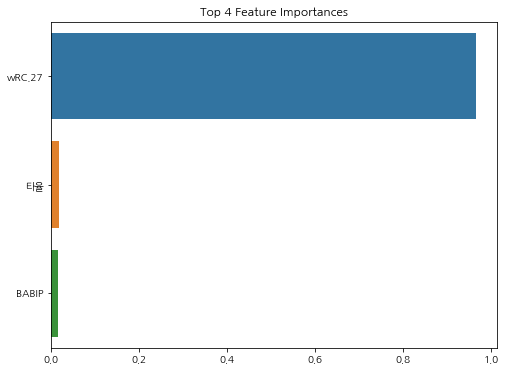

In [929]:
rf_importances_values = rf1.feature_importances_
rf_importances = pd.Series(rf_importances_values, index = X_train.columns)
rf_top4 = rf_importances.sort_values(ascending=False)[:4]

plt.figure(figsize=(8,6))
plt.title('Top 4 Feature Importances')
sns.barplot(x=rf_top4, y=rf_top4.index)
plt.show()

#### 과적합 확인

In [930]:
from sklearn.model_selection import cross_val_score

In [931]:
scores = cross_val_score(rf1, 출루율_X, 출루율_y, cv=5)
print("교차 검증 점수: {}".format(scores))

교차 검증 점수: [0.89500645 0.88626847 0.92936264 0.88616881 0.86812116]


### 1-2. 출루율 & wOBA

In [932]:
#출루율 데이터 생성-1
출루율_X = newdata[['wOBA', '타율', 'BABIP']]
출루율_y = newdata[['출루율']]

In [933]:
#출루율 train, test
X_train, X_test, y_train, y_test=train_test_split(출루율_X, 출루율_y, test_size=0.2, random_state=1234)

In [934]:
#출루율 예측
rf = RandomForestRegressor(n_estimators = 100, n_jobs=-1, random_state = 1234)

#모델 fitting
rf.fit(X_train,y_train)

print('성능(accuracy) :', rf.score(X_test, y_test)) 

y_pred = rf.predict(X_test)
print('mean_squared_errors: {}'.format(mean_squared_error(y_test, y_pred))) #MSE
print('mean_absolute_errors: {}'.format(mean_absolute_error(y_test, y_pred)))

성능(accuracy) : 0.8620823383929087
mean_squared_errors: 0.00047549955919540135
mean_absolute_errors: 0.016015919540229857


In [935]:
params = {
        'n_estimators' : [100, 200, 300],
        'min_samples_leaf' : [1, 3, 4, 8, 16],
        'min_samples_split' : [2, 6, 8, 16, 20],
    }
rf = RandomForestRegressor(random_state=1234, n_jobs=-1)
grid_cv = GridSearchCV(rf, param_grid=params, cv=4, n_jobs=-1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터 :\n', grid_cv.best_params_)

최적 하이퍼 파라미터 :
 {'min_samples_leaf': 4, 'min_samples_split': 16, 'n_estimators': 200}


In [936]:
#파라미터 튜닝 후 출루율 예측
rf1 = RandomForestRegressor(n_estimators = 200, n_jobs=-1, min_samples_leaf = 4, min_samples_split = 2, random_state = 1234)

#모델 fitting
rf1.fit(X_train,y_train)

print('성능(accuracy) :', rf1.score(X_test, y_test)) 

y_pred = rf1.predict(X_test)
print('mean_squared_errors: {}'.format(mean_squared_error(y_test, y_pred))) #MSE
print('mean_absolute_errors: {}'.format(mean_absolute_error(y_test, y_pred)))

성능(accuracy) : 0.8702329768993222
mean_squared_errors: 0.00044739855333581895
mean_absolute_errors: 0.015846399567619206


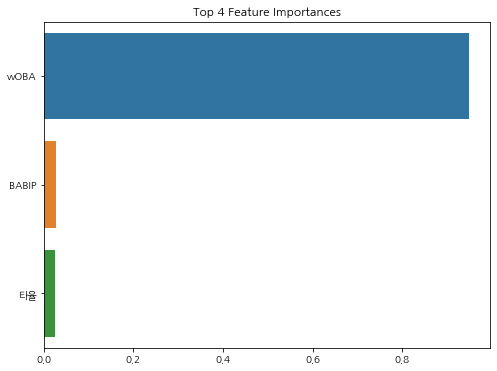

In [937]:
rf_importances_values = rf1.feature_importances_
rf_importances = pd.Series(rf_importances_values, index = X_train.columns)
rf_top4 = rf_importances.sort_values(ascending=False)[:4]

plt.figure(figsize=(8,6))
plt.title('Top 4 Feature Importances')
sns.barplot(x=rf_top4, y=rf_top4.index)
plt.show()

### 2-1. 장타율 & wRC/27

In [938]:
#장타율 데이터 생성

장타율_X = newdata[['wRC.27', '타율', 'BABIP',"barrels_p"]]
장타율_y = newdata['장타율']

In [939]:
#장타율 train, test
X_train, X_test, y_train, y_test=train_test_split(장타율_X, 장타율_y, test_size=0.2, random_state=1234)

In [940]:
#장타율 예측
rf = RandomForestRegressor(n_estimators = 100, n_jobs=-1, random_state = 1234)

#모델 fitting
rf.fit(X_train,y_train)

print('성능(accuracy) :', rf.score(X_test, y_test)) 

y_pred = rf.predict(X_test)
print('mean_squared_errors: {}'.format(mean_squared_error(y_test, y_pred))) #MSE
print('mean_absolute_errors: {}'.format(mean_absolute_error(y_test, y_pred)))

성능(accuracy) : 0.8648481136246406
mean_squared_errors: 0.0016095234086206881
mean_absolute_errors: 0.029671896551724117


In [941]:
params = {
        'n_estimators' : [100, 200, 300],
        'min_samples_leaf' : [3, 4, 8, 16],
        'min_samples_split' : [6, 8, 16, 20],
    }
rf = RandomForestRegressor(random_state=1234, n_jobs=-1)
grid_cv = GridSearchCV(rf, param_grid=params, cv=4, n_jobs=-1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터 :\n', grid_cv.best_params_)

최적 하이퍼 파라미터 :
 {'min_samples_leaf': 3, 'min_samples_split': 16, 'n_estimators': 300}


In [942]:
#파라미터 튜닝 후 장타율 예측
rf2 = RandomForestRegressor(n_estimators = 300, n_jobs=-1, min_samples_leaf = 4, min_samples_split = 16, random_state = 1234)

#모델 fitting
rf2.fit(X_train,y_train)

print('성능(accuracy) :', rf2.score(X_test, y_test)) 

y_pred = rf2.predict(X_test)
print('mean_squared_errors: {}'.format(mean_squared_error(y_test, y_pred))) #MSE
print('mean_absolute_errors: {}'.format(mean_absolute_error(y_test, y_pred)))

성능(accuracy) : 0.8588910742735325
mean_squared_errors: 0.0016804657723480752
mean_absolute_errors: 0.029848204103493637


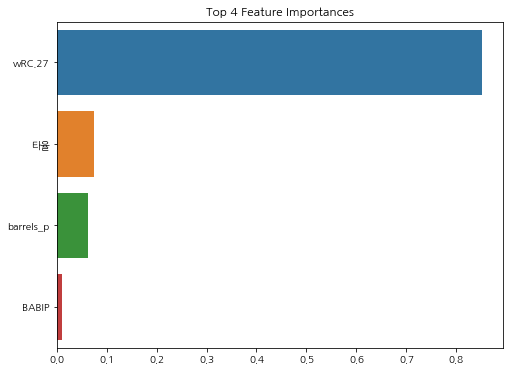

In [943]:
rf_importances_values = rf2.feature_importances_
rf_importances = pd.Series(rf_importances_values, index = X_train.columns)
rf_top4 = rf_importances.sort_values(ascending=False)[:4]


plt.figure(figsize=(8,6))
plt.title('Top 4 Feature Importances')
sns.barplot(x=rf_top4, y=rf_top4.index)
plt.show()

In [944]:
#과적합 확인
scores = cross_val_score(rf2, 장타율_X, 장타율_y, cv=5)
print("교차 검증 점수: {}".format(scores))

교차 검증 점수: [0.8575512  0.87284962 0.90980557 0.88280049 0.79039185]


### 2-2. 장타율 & wOBA

In [945]:
#장타율 데이터 생성
장타율_X = newdata[['wOBA', '타율', 'BABIP',"barrels_p"]]
장타율_y = newdata['장타율']

In [946]:
#장타율 train, test
X_train, X_test, y_train, y_test=train_test_split(장타율_X, 장타율_y, test_size=0.2, random_state=1234)

In [947]:
#장타율 예측
rf = RandomForestRegressor(n_estimators = 100, n_jobs=-1, random_state = 1234)

#모델 fitting
rf.fit(X_train,y_train)

print('성능(accuracy) :', rf.score(X_test, y_test)) 

y_pred = rf.predict(X_test)
print('mean_squared_errors: {}'.format(mean_squared_error(y_test, y_pred))) #MSE
print('mean_absolute_errors: {}'.format(mean_absolute_error(y_test, y_pred)))

성능(accuracy) : 0.8776470011141905
mean_squared_errors: 0.0014571014959770129
mean_absolute_errors: 0.02853063218390804


In [948]:
params = {
        'n_estimators' : [100, 200, 300],
        'min_samples_leaf' : [3, 4, 8, 16],
        'min_samples_split' : [6, 8, 16, 20],
    }
rf = RandomForestRegressor(random_state=1234, n_jobs=-1)
grid_cv = GridSearchCV(rf, param_grid=params, cv=4, n_jobs=-1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터 :\n', grid_cv.best_params_)

최적 하이퍼 파라미터 :
 {'min_samples_leaf': 4, 'min_samples_split': 16, 'n_estimators': 300}


In [949]:
#파라미터 튜닝 후 장타율 예측
rf2 = RandomForestRegressor(n_estimators = 300, n_jobs=-1, min_samples_leaf = 4, min_samples_split = 16, random_state = 1234)

#모델 fitting
rf2.fit(X_train,y_train)

print('성능(accuracy) :', rf2.score(X_test, y_test)) 

y_pred = rf2.predict(X_test)
print('mean_squared_errors: {}'.format(mean_squared_error(y_test, y_pred))) #MSE
print('mean_absolute_errors: {}'.format(mean_absolute_error(y_test, y_pred)))

성능(accuracy) : 0.8704377723479162
mean_squared_errors: 0.0015429561796859318
mean_absolute_errors: 0.029171595009729996


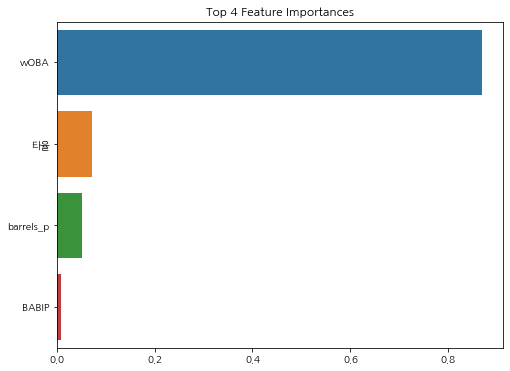

In [950]:
rf_importances_values = rf2.feature_importances_
rf_importances = pd.Series(rf_importances_values, index = X_train.columns)
rf_top4 = rf_importances.sort_values(ascending=False)[:4]

plt.figure(figsize=(8,6))
plt.title('Top 4 Feature Importances')
sns.barplot(x=rf_top4, y=rf_top4.index)
plt.show()

### 3-1. OPS & wRC+

In [951]:
#OPS 데이터 생성
OPS_X = newdata[['wRC.27', '타율', 'barrels_p' , 'BABIP']]
OPS_y = newdata['OPS']

In [952]:
#OPS train, test
X_train, X_test, y_train, y_test=train_test_split(OPS_X, OPS_y, test_size=0.2, random_state=1234)

In [953]:
#OPS 예측
rf = RandomForestRegressor(n_estimators = 100, n_jobs=-1, random_state = 1234)

#모델 fitting
rf.fit(X_train,y_train)

print('성능(accuracy) :', rf.score(X_test, y_test)) 

y_pred = rf.predict(X_test)
print('mean_squared_errors: {}'.format(mean_squared_error(y_test, y_pred))) #MSE
print('mean_absolute_errors: {}'.format(mean_absolute_error(y_test, y_pred)))

성능(accuracy) : 0.955420383574748
mean_squared_errors: 0.001092177239201151
mean_absolute_errors: 0.024168971264367827


In [954]:
params = {
        'n_estimators' : [100, 200, 300],
        'min_samples_leaf' : [3, 4, 8, 16],
        'min_samples_split' : [6, 8, 16, 20],
    }
rf = RandomForestRegressor(random_state=1234, n_jobs=-1)
grid_cv = GridSearchCV(rf, param_grid=params, cv=4, n_jobs=-1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터 :\n', grid_cv.best_params_)

최적 하이퍼 파라미터 :
 {'min_samples_leaf': 3, 'min_samples_split': 6, 'n_estimators': 200}


In [955]:
#파라미터 튜닝 후 OPS 예측
rf3 = RandomForestRegressor(n_estimators = 100, n_jobs=-1, min_samples_leaf = 3, min_samples_split = 6, random_state = 1234)

#모델 fitting
rf3.fit(X_train,y_train)

print('성능(accuracy) :', rf3.score(X_test, y_test)) 

y_pred = rf3.predict(X_test)
print('mean_squared_errors: {}'.format(mean_squared_error(y_test, y_pred))) #MSE
print('mean_absolute_errors: {}'.format(mean_absolute_error(y_test, y_pred)))

성능(accuracy) : 0.9564732820061317
mean_squared_errors: 0.0010663817794336523
mean_absolute_errors: 0.023561768349307146


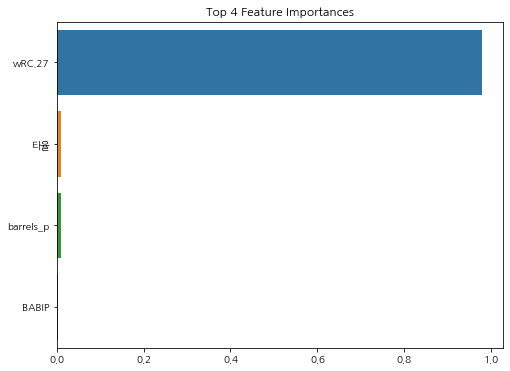

In [956]:
rf_importances_values = rf3.feature_importances_
rf_importances = pd.Series(rf_importances_values, index = X_train.columns)
rf_top4 = rf_importances.sort_values(ascending=False)[:4]

plt.figure(figsize=(8,6))
plt.title('Top 4 Feature Importances')
sns.barplot(x=rf_top4, y=rf_top4.index)
plt.show()

In [957]:
#과적합 확인
scores = cross_val_score(rf3, OPS_X, OPS_y, cv=5)
print("교차 검증 점수: {}".format(scores))

교차 검증 점수: [0.96429347 0.96136262 0.9775237  0.96590853 0.9508428 ]


### 3-2. OPS & wOBA

In [958]:
#OPS 데이터 생성
OPS_X = newdata[['wOBA', '타율', 'barrels_p' , 'BABIP']]
OPS_y = newdata['OPS']

In [959]:
#OPS train, test
X_train, X_test, y_train, y_test=train_test_split(OPS_X, OPS_y, test_size=0.2, random_state=1234)

In [960]:
#OPS 예측
rf = RandomForestRegressor(n_estimators = 100, n_jobs=-1, random_state = 1234)

#모델 fitting
rf.fit(X_train,y_train)

print('성능(accuracy) :', rf.score(X_test, y_test)) 

y_pred = rf.predict(X_test)
print('mean_squared_errors: {}'.format(mean_squared_error(y_test, y_pred))) #MSE
print('mean_absolute_errors: {}'.format(mean_absolute_error(y_test, y_pred)))

성능(accuracy) : 0.9628362756867921
mean_squared_errors: 0.0009104917689655194
mean_absolute_errors: 0.023178965517241388


In [961]:
params = {
        'n_estimators' : [100, 200, 300],
        'min_samples_leaf' : [3, 4, 8, 16],
        'min_samples_split' : [6, 8, 16, 20],
    }
rf = RandomForestRegressor(random_state=1234, n_jobs=-1)
grid_cv = GridSearchCV(rf, param_grid=params, cv=4, n_jobs=-1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터 :\n', grid_cv.best_params_)

최적 하이퍼 파라미터 :
 {'min_samples_leaf': 3, 'min_samples_split': 6, 'n_estimators': 300}


In [962]:
#파라미터 튜닝 후 OPS 예측
rf3 = RandomForestRegressor(n_estimators = 300, n_jobs=-1, min_samples_leaf = 3, min_samples_split = 6, random_state = 1234)

#모델 fitting
rf3.fit(X_train,y_train)

print('성능(accuracy) :', rf3.score(X_test, y_test)) 

y_pred = rf3.predict(X_test)
print('mean_squared_errors: {}'.format(mean_squared_error(y_test, y_pred))) #MSE
print('mean_absolute_errors: {}'.format(mean_absolute_error(y_test, y_pred)))

성능(accuracy) : 0.9637013843375427
mean_squared_errors: 0.0008892970604069562
mean_absolute_errors: 0.02312643881416582


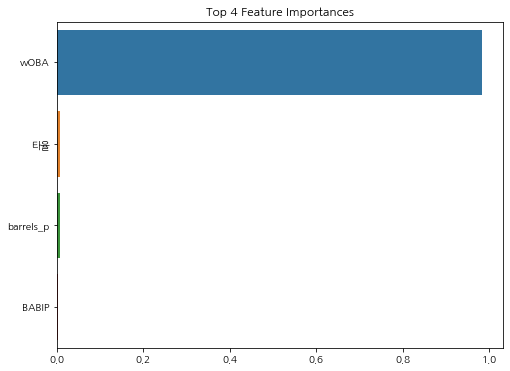

In [963]:
rf_importances_values = rf3.feature_importances_
rf_importances = pd.Series(rf_importances_values, index = X_train.columns)
rf_top4 = rf_importances.sort_values(ascending=False)[:4]

plt.figure(figsize=(8,6))
plt.title('Top 4 Feature Importances')
sns.barplot(x=rf_top4, y=rf_top4.index)
plt.show()

## Xgboost

In [964]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
import random
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

### 1-1. 장타율 & wRC/27

In [965]:
#장타율 데이터 생성
장타율_X = newdata[['wRC.27', '타율', 'barrels_p',"BABIP"]]
장타율_y = newdata['장타율']

X_train, X_test, y_train, y_test = train_test_split(장타율_X, 장타율_y, test_size=0.2, random_state = 1234)

In [966]:
params = { 'max_depth': [3, 5, 10],
           'learning_rate': [0.01, 0.05, 0.1],
           'n_estimators': [100, 200, 300, 500],
           'colsample_bytree': [0.5, 0.7, 1],
           'subsample' : [0.5, 0.7, 1]}

xgboost = xgb.XGBRegressor(objective='reg:squarederror', seed = 1234)

clf = GridSearchCV(estimator = xgboost, 
                   param_grid = params,
                   scoring = 'neg_mean_squared_error', 
                   cv = 4,
                   verbose = 1)

clf.fit(장타율_X, 장타율_y)

print("Best parameters:", clf.best_params_)
print("Lowest RMSE: ", (-clf.best_score_)**(1/2.0))

Fitting 4 folds for each of 324 candidates, totalling 1296 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best parameters: {'colsample_bytree': 1, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.5}
Lowest RMSE:  0.03716886538168091


[Parallel(n_jobs=1)]: Done 1296 out of 1296 | elapsed:  6.8min finished


In [967]:
#장타율 모델 생성
xgboost1 = xgb.XGBRegressor(colsample_bytree = 0.7, learning_rate = 0.01, max_depth = 3, n_estimators = 500,
                           subsample = 0.5, objective='reg:squarederror', seed = 1234)
xgboost1.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.01, max_delta_step=0, max_depth=3,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=500, n_jobs=8, num_parallel_tree=1,
             objective='reg:squarederror', random_state=1234, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=1234, subsample=0.5,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [968]:
y_pred = xgboost1.predict(X_test)

print('r squared score: {}'.format(r2_score(y_test, y_pred)))
print('mean_squared_errors: {}'.format(mean_squared_error(y_test, y_pred))) #MSE
print('mean_absolute_errors: {}'.format(mean_absolute_error(y_test, y_pred)))

r squared score: 0.8691399853728877
mean_squared_errors: 0.001558411520870812
mean_absolute_errors: 0.029275173662722795


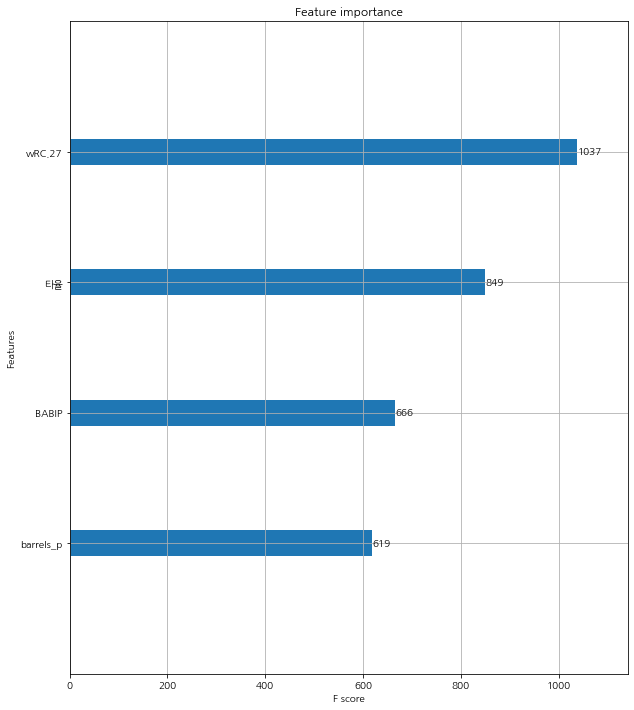

In [969]:
#변수중요도 시각화
flg, ax = plt.subplots(figsize=(10,12))
plot_importance(xgboost1, ax=ax)

### 1-2. 장타율 & wOBA

In [970]:
#장타율 데이터 생성
장타율_X = newdata[['wOBA', '타율', 'barrels_p' , "BABIP"]]
장타율_y = newdata['장타율']

X_train, X_test, y_train, y_test = train_test_split(장타율_X, 장타율_y, test_size=0.2, random_state = 1234)

In [971]:
#하이퍼 파라미터 튜닝
params = { 'max_depth': [3, 5, 10],
           'learning_rate': [0.01, 0.05, 0.1],
           'n_estimators': [100, 200, 300, 500],
           'colsample_bytree': [0.5, 0.7, 1],
           'subsample' : [0.5, 0.7, 1]}

xgboost = xgb.XGBRegressor(objective='reg:squarederror', seed = 1234)

clf = GridSearchCV(estimator = xgboost, 
                   param_grid = params,
                   scoring = 'neg_mean_squared_error', 
                   cv = 4,
                   verbose = 1)

clf.fit(장타율_X, 장타율_y)

print("Best parameters:", clf.best_params_)
print("Lowest RMSE: ", (-clf.best_score_)**(1/2.0))

Fitting 4 folds for each of 324 candidates, totalling 1296 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best parameters: {'colsample_bytree': 1, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.7}
Lowest RMSE:  0.03671025560359276


[Parallel(n_jobs=1)]: Done 1296 out of 1296 | elapsed:  6.5min finished


In [972]:
#장타율 모델 생성
xgboost1 = xgb.XGBRegressor(colsample_bytree = 0.7, learning_rate = 0.01, max_depth = 3, n_estimators = 500,
                           subsample = 0.5, objective='reg:squarederror', seed = 1234)
xgboost1.fit(X_train, y_train)
y_pred = xgboost1.predict(X_test)

print('r squared score: {}'.format(r2_score(y_test, y_pred)))
print('mean_squared_errors: {}'.format(mean_squared_error(y_test, y_pred))) #MSE
print('mean_absolute_errors: {}'.format(mean_absolute_error(y_test, y_pred)))

r squared score: 0.8789155732699913
mean_squared_errors: 0.0014419940739865047
mean_absolute_errors: 0.02837575505416969


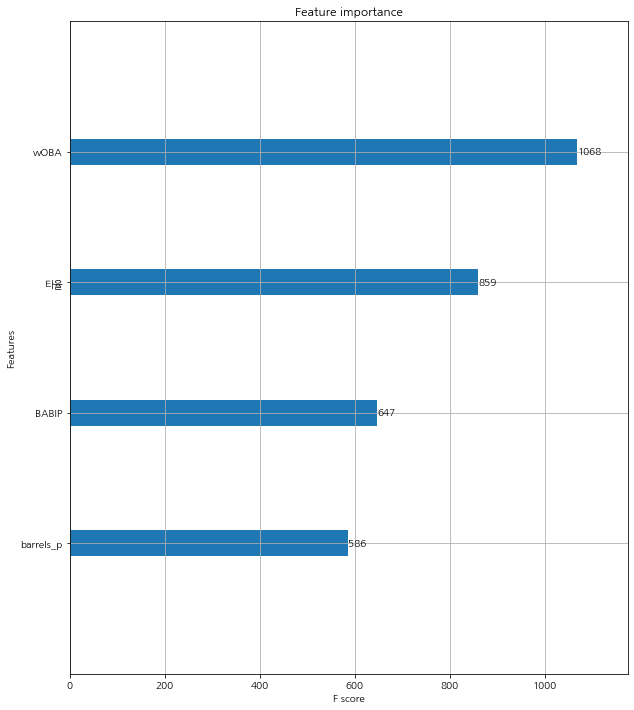

In [973]:
#변수중요도 시각화
flg, ax = plt.subplots(figsize=(10,12))
plot_importance(xgboost1, ax=ax)

### 2-1. 출루율 & wRC/27

In [974]:
#출루율 데이터 생성
출루율_X = newdata[['wRC.27', '타율','BABIP']]
출루율_y = newdata['출루율']

X_train, X_test, y_train, y_test = train_test_split(출루율_X, 출루율_y, test_size=0.2, random_state = 1234)

In [975]:
params = { 'max_depth': [3, 5, 10],
           'learning_rate': [0.01, 0.05, 0.1],
           'n_estimators': [100, 200, 300, 500],
           'colsample_bytree': [0.5, 0.7, 1],
           'subsample' : [0.5, 0.7, 1]}

xgboost = xgb.XGBRegressor(objective='reg:squarederror', seed = 1234)

clf = GridSearchCV(estimator = xgboost, 
                   param_grid = params,
                   scoring = 'neg_mean_squared_error', 
                   cv = 4,
                   verbose = 1)

clf.fit(출루율_X, 출루율_y)

print("Best parameters:", clf.best_params_)
print("Lowest RMSE: ", (-clf.best_score_)**(1/2.0))

Fitting 4 folds for each of 324 candidates, totalling 1296 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best parameters: {'colsample_bytree': 1, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.5}
Lowest RMSE:  0.019715239711205316


[Parallel(n_jobs=1)]: Done 1296 out of 1296 | elapsed:  6.1min finished


In [976]:
#출루율 모델 생성
xgboost2 = xgb.XGBRegressor(colsample_bytree = 1, learning_rate = 0.05, max_depth = 3, n_estimators = 200,
                           subsample = 0.5, objective='reg:squarederror', seed = 1234)
xgboost2.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=3,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=200, n_jobs=8, num_parallel_tree=1,
             objective='reg:squarederror', random_state=1234, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=1234, subsample=0.5,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [977]:
y_pred = xgboost2.predict(X_test)

print('r squared score: {}'.format(r2_score(y_test, y_pred)))
print('mean_squared_errors: {}'.format(mean_squared_error(y_test, y_pred))) #MSE
print('mean_absolute_errors: {}'.format(mean_absolute_error(y_test, y_pred)))

r squared score: 0.8963331834476601
mean_squared_errors: 0.0003574127127695844
mean_absolute_errors: 0.014130640188510386


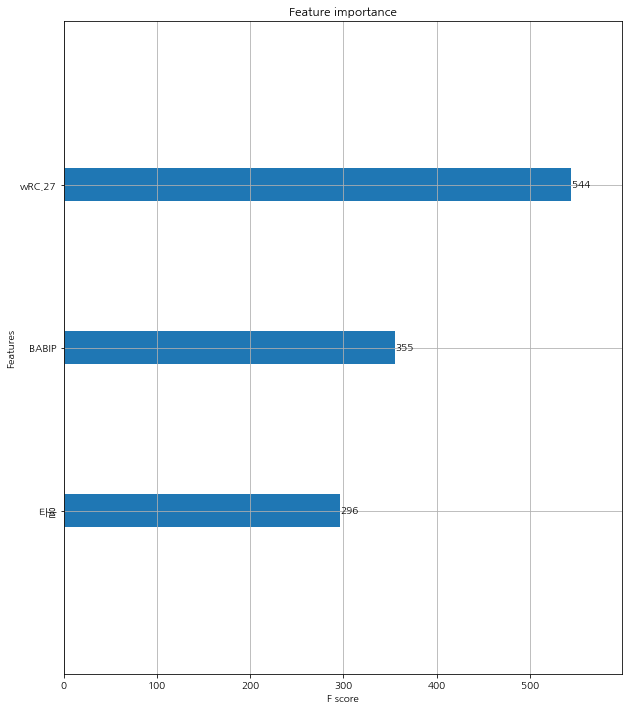

In [978]:
#변수중요도 시각화
flg, ax = plt.subplots(figsize=(10,12))
plot_importance(xgboost2, ax=ax)

### 2-2. 출루율 & wOBA

In [979]:
#출루율 데이터 생성
출루율_X = newdata[['wOBA', '타율','BABIP']]
출루율_y = newdata['출루율']

X_train, X_test, y_train, y_test = train_test_split(출루율_X, 출루율_y, test_size=0.2, random_state = 1234)

In [980]:
#하이퍼 파라미터 튜닝
params = { 'max_depth': [3, 5, 10],
           'learning_rate': [0.01, 0.05, 0.1],
           'n_estimators': [100, 200, 300, 500],
           'colsample_bytree': [0.5, 0.7, 1],
           'subsample' : [0.5, 0.7, 1]}

xgboost = xgb.XGBRegressor(objective='reg:squarederror', seed = 1234)

clf = GridSearchCV(estimator = xgboost, 
                   param_grid = params,
                   scoring = 'neg_mean_squared_error', 
                   cv = 4,
                   verbose = 1)

clf.fit(출루율_X, 출루율_y)

print("Best parameters:", clf.best_params_)
print("Lowest RMSE: ", (-clf.best_score_)**(1/2.0))

Fitting 4 folds for each of 324 candidates, totalling 1296 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best parameters: {'colsample_bytree': 1, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.5}
Lowest RMSE:  0.020935231899809958


[Parallel(n_jobs=1)]: Done 1296 out of 1296 | elapsed:  6.0min finished


In [981]:
#출루율 모델 생성
xgboost2 = xgb.XGBRegressor(colsample_bytree = 1, learning_rate = 0.05, max_depth = 3, n_estimators = 200,
                           subsample = 0.7, objective='reg:squarederror', seed = 1234)
xgboost2.fit(X_train, y_train)
y_pred = xgboost2.predict(X_test)

print('r squared score: {}'.format(r2_score(y_test, y_pred)))
print('mean_squared_errors: {}'.format(mean_squared_error(y_test, y_pred))) #MSE
print('mean_absolute_errors: {}'.format(mean_absolute_error(y_test, y_pred)))

r squared score: 0.8809395020814921
mean_squared_errors: 0.0004104856014679163
mean_absolute_errors: 0.015000378519981756


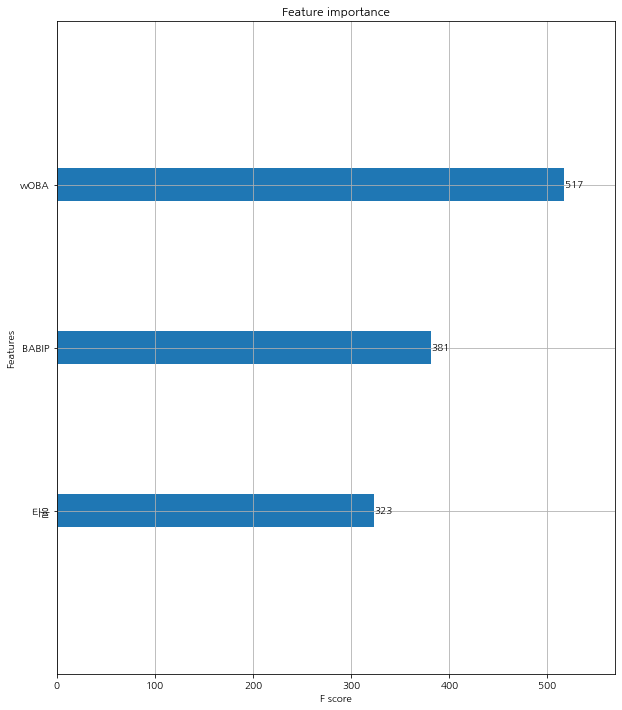

In [982]:
#변수중요도 시각화
flg, ax = plt.subplots(figsize=(10,12))
plot_importance(xgboost2, ax=ax)

### 3-1. OPS & wRC/27

In [983]:
#출루율 데이터 생성
OPS_X = newdata[['wRC.27', '타율', 'barrels_p' , 'BABIP']]
OPS_y = newdata['OPS']

X_train, X_test, y_train, y_test = train_test_split(OPS_X, OPS_y, test_size=0.2, random_state = 1234)

In [984]:
params = { 'max_depth': [3, 5, 10],
           'learning_rate': [0.01, 0.05, 0.1],
           'n_estimators': [100, 200, 300, 500],
           'colsample_bytree': [0.5, 0.7, 1],
           'subsample' : [0.5, 0.7, 1]}

xgboost = xgb.XGBRegressor(objective='reg:squarederror', seed = 1234)

clf = GridSearchCV(estimator = xgboost, 
                   param_grid = params,
                   scoring = 'neg_mean_squared_error', 
                   cv = 4,
                   verbose = 1)

clf.fit(OPS_X, OPS_y)

print("Best parameters:", clf.best_params_)
print("Lowest RMSE: ", (-clf.best_score_)**(1/2.0))

Fitting 4 folds for each of 324 candidates, totalling 1296 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best parameters: {'colsample_bytree': 1, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.5}
Lowest RMSE:  0.02745615942221661


[Parallel(n_jobs=1)]: Done 1296 out of 1296 | elapsed:  6.5min finished


In [985]:
#OPS 모델 생성
xgboost3 = xgb.XGBRegressor(colsample_bytree = 1, learning_rate = 0.01, max_depth = 3, n_estimators = 500,
                           subsample = 0.5, objective='reg:squarederror', seed = 1234)
xgboost3.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.01, max_delta_step=0, max_depth=3,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=500, n_jobs=8, num_parallel_tree=1,
             objective='reg:squarederror', random_state=1234, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=1234, subsample=0.5,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [986]:
y_pred = xgboost3.predict(X_test)

print('r squared score: {}'.format(r2_score(y_test, y_pred)))
print('mean_squared_errors: {}'.format(mean_squared_error(y_test, y_pred))) #MSE
print('mean_absolute_errors: {}'.format(mean_absolute_error(y_test, y_pred)))

r squared score: 0.9631850189991076
mean_squared_errors: 0.0009019477405826546
mean_absolute_errors: 0.021285941566544023


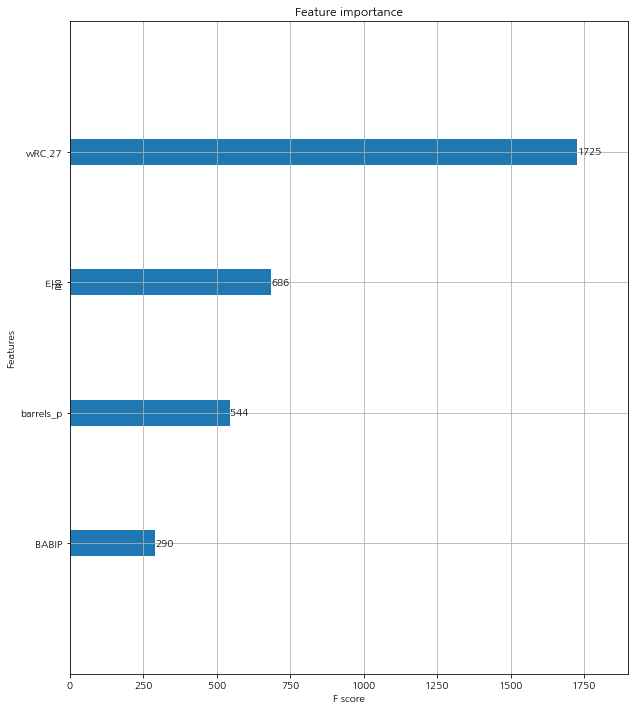

In [987]:
#변수중요도 시각화
flg, ax = plt.subplots(figsize=(10,12))
plot_importance(xgboost3, ax=ax)

### 3-2. OPS & wOBA

In [988]:
#OPS 데이터 생성
OPS_X = newdata[['wOBA', '타율', 'barrels_p', 'BABIP']]
OPS_y = newdata['OPS']

X_train, X_test, y_train, y_test = train_test_split(OPS_X, OPS_y, test_size=0.2, random_state = 1234)

In [989]:
#하이퍼 파라미터 튜닝
params = { 'max_depth': [3, 5, 10],
           'learning_rate': [0.01, 0.05, 0.1],
           'n_estimators': [100, 200, 300, 500],
           'colsample_bytree': [0.5, 0.7, 1],
           'subsample' : [0.5, 0.7, 1]}

xgboost = xgb.XGBRegressor(objective='reg:squarederror', seed = 1234)

clf = GridSearchCV(estimator = xgboost, 
                   param_grid = params,
                   scoring = 'neg_mean_squared_error', 
                   cv = 4,
                   verbose = 1)

clf.fit(OPS_X, OPS_y)

print("Best parameters:", clf.best_params_)
print("Lowest RMSE: ", (-clf.best_score_)**(1/2.0))

Fitting 4 folds for each of 324 candidates, totalling 1296 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best parameters: {'colsample_bytree': 1, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.5}
Lowest RMSE:  0.02751851442960648


[Parallel(n_jobs=1)]: Done 1296 out of 1296 | elapsed:  6.4min finished


In [990]:
#OPS 모델 생성
xgboost3 = xgb.XGBRegressor(colsample_bytree = 1, learning_rate = 0.1, max_depth = 3, n_estimators = 100,
                           subsample = 0.5, objective='reg:squarederror', seed = 1234)
xgboost3.fit(X_train, y_train)
y_pred = xgboost3.predict(X_test)

print('r squared score: {}'.format(r2_score(y_test, y_pred)))
print('mean_squared_errors: {}'.format(mean_squared_error(y_test, y_pred))) #MSE
print('mean_absolute_errors: {}'.format(mean_absolute_error(y_test, y_pred)))

r squared score: 0.9707237926091482
mean_squared_errors: 0.0007172517380456588
mean_absolute_errors: 0.02112090995873528


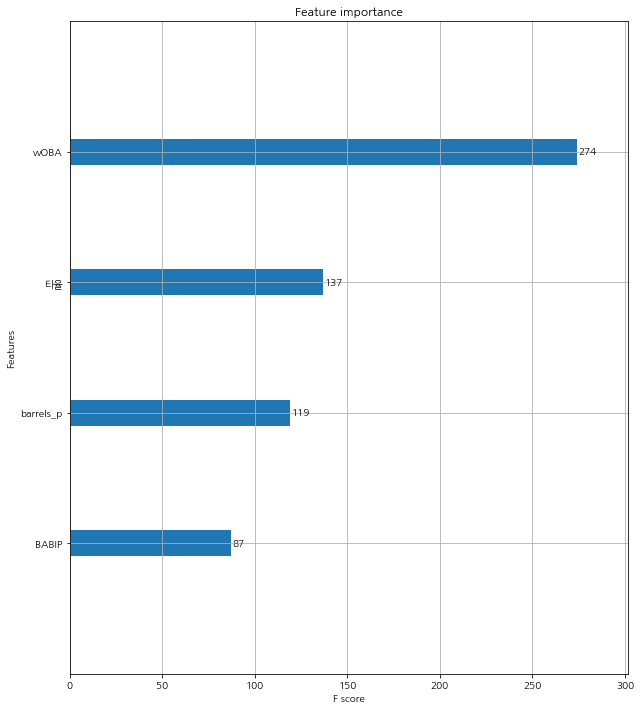

In [991]:
#변수중요도 시각화
flg, ax = plt.subplots(figsize=(10,12))
plot_importance(xgboost3, ax=ax)

## 최종 test

In [992]:
#test dataset 불러오기
test = pd.read_csv('./test_mean.csv', encoding = 'euc-kr')
test.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [993]:
test

,PCODE,이름,타율_test,wRC._test,WAR_test,BABIP_test,wOBA_test,wRC.27_test,wOBA_p_test,wRC_p_test,barrels_p_test
0,67341,이정후,0.343271,149.640000,4.687333,0.358685,0.415449,8.333934,0.415202,89.993333,0.026285
1,67872,로맥,0.269257,126.953333,2.732000,0.287474,0.391559,7.139338,0.386673,77.473333,0.112476
2,68050,강백호,0.352985,170.860000,4.541333,0.400642,0.447151,10.362757,0.444298,94.713333,0.073721
3,75847,최정,0.276262,149.793333,4.397333,0.283749,0.420735,8.480735,0.415673,81.226667,0.109189
4,76232,양의지,0.348146,175.980000,5.189333,0.334920,0.460485,10.350588,0.455404,89.760000,0.089261
5,76290,김현수,0.310235,137.240000,3.216667,0.310916,0.389956,7.154816,0.400603,80.693333,0.104083
6,78224,김재환,0.282050,146.346667,3.742667,0.322358,0.399783,7.579154,0.412202,81.553333,0.144711
7,78513,전준우,0.305999,124.113333,3.047333,0.320700,0.384732,6.740037,0.380886,76.826667,0.061376
8,79192,채은성,0.311482,140.033333,2.676667,0.335627,0.389162,6.896949,0.400901,63.306667,0.085554
9,79215,박건우,0.320540,130.740000,2.992000,0.353663,0.384180,6.713493,0.389393,65.873333,0.061179


In [994]:
test_1set = test[['wRC.27_test', '타율_test' , "BABIP_test"]]
test_2set = test[['wOBA_test', '타율_test', 'barrels_p_test' ,"BABIP_test" ]]


### 1. 출루율 예측

In [995]:
#출루율 데이터 생성
출루율_X = newdata[['wRC.27', '타율', 'BABIP']]
출루율_y = newdata['출루율']

X_train, X_test, y_train, y_test = train_test_split(출루율_X, 출루율_y, test_size=0.2, random_state = 1234)

In [996]:
#출루율 모델 생성
xgboost2 = xgb.XGBRegressor(colsample_bytree = 1, learning_rate = 0.05, max_depth = 3, n_estimators = 200,
                           subsample = 0.7, objective='reg:squarederror', seed = 1234)
xgboost2.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=3,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=200, n_jobs=8, num_parallel_tree=1,
             objective='reg:squarederror', random_state=1234, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=1234, subsample=0.7,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [997]:
출루율_pred = xgboost2.predict(test_1set)
출루율_pred

array([0.4099444 , 0.38108307, 0.45838323, 0.39673436, 0.43930808,
       0.38329974, 0.38209522, 0.37505937, 0.38427255, 0.38325238],
      dtype=float32)

### 2. OPS 예측

In [998]:
#출루율 데이터 생성
OPS_X = newdata[['wOBA', '타율', 'barrels_p' , 'BABIP']]
OPS_y = newdata['OPS']

X_train, X_test, y_train, y_test = train_test_split(OPS_X, OPS_y, test_size=0.2, random_state = 1234)

In [999]:
#OPS 모델 생성
xgboost3 = xgb.XGBRegressor(colsample_bytree = 1, learning_rate = 0.1, max_depth = 3, n_estimators = 100,
                           subsample = 0.5, objective='reg:squarederror', seed = 1234)
xgboost3.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=3,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1,
             objective='reg:squarederror', random_state=1234, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=1234, subsample=0.5,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [1000]:
test_2set

,wOBA_test,타율_test,barrels_p_test,BABIP_test
0,0.415449,0.343271,0.026285,0.358685
1,0.391559,0.269257,0.112476,0.287474
2,0.447151,0.352985,0.073721,0.400642
3,0.420735,0.276262,0.109189,0.283749
4,0.460485,0.348146,0.089261,0.334920
5,0.389956,0.310235,0.104083,0.310916
6,0.399783,0.282050,0.144711,0.322358
7,0.384732,0.305999,0.061376,0.320700
8,0.389162,0.311482,0.085554,0.335627
9,0.384180,0.320540,0.061179,0.353663


In [1001]:
OPS_pred = xgboost3.predict(test_2set)
OPS_pred

array([0.92723674, 0.87931335, 1.0171155 , 0.9646978 , 1.0570076 ,
       0.8840287 , 0.9211411 , 0.8658753 , 0.8811182 , 0.8605727 ],
      dtype=float32)

In [1002]:
#최종 예측 결과 데이터셋 생성
submission = pd.concat([test[['PCODE', '이름']], pd.DataFrame(출루율_pred), pd.DataFrame(OPS_pred)], axis = 1)
submission.columns = ['PCODE', '이름', '출루율', 'OPS']

In [1003]:
#장타율 칼럼 생성
submission['장타율'] = submission['OPS'] - submission['출루율']
submission

,PCODE,이름,출루율,OPS,장타율
0,67341,이정후,0.409944,0.927237,0.517292
1,67872,로맥,0.381083,0.879313,0.498230
2,68050,강백호,0.458383,1.017115,0.558732
3,75847,최정,0.396734,0.964698,0.567963
4,76232,양의지,0.439308,1.057008,0.617700
5,76290,김현수,0.383300,0.884029,0.500729
6,78224,김재환,0.382095,0.921141,0.539046
7,78513,전준우,0.375059,0.865875,0.490816
8,79192,채은성,0.384273,0.881118,0.496846
9,79215,박건우,0.383252,0.860573,0.477320


In [1004]:
submission.to_csv('submisiion.csv', encoding = 'euc-kr')

### 장타율 모델 예측값과 계산값의 오차 비교

In [1005]:
test_set2 = test[['wOBA_test', '타율_test', 'barrels_p_test' , "BABIP_test"]]
test_set2

,wOBA_test,타율_test,barrels_p_test,BABIP_test
0,0.415449,0.343271,0.026285,0.358685
1,0.391559,0.269257,0.112476,0.287474
2,0.447151,0.352985,0.073721,0.400642
3,0.420735,0.276262,0.109189,0.283749
4,0.460485,0.348146,0.089261,0.334920
5,0.389956,0.310235,0.104083,0.310916
6,0.399783,0.282050,0.144711,0.322358
7,0.384732,0.305999,0.061376,0.320700
8,0.389162,0.311482,0.085554,0.335627
9,0.384180,0.320540,0.061179,0.353663


In [1006]:
#장타율 데이터 생성
장타율_X = newdata[['wOBA', '타율', 'barrels_p' , "BABIP"]]
장타율_y = newdata['장타율']

X_train, X_test, y_train, y_test = train_test_split(장타율_X, 장타율_y, test_size=0.2, random_state = 1234)

In [1007]:
#장타율 모델 생성
xgboost1 = xgb.XGBRegressor(colsample_bytree = 0.7, learning_rate = 0.01, max_depth = 3, n_estimators = 500,
                           subsample = 0.5, objective='reg:squarederror', seed = 1234)
xgboost1.fit(X_train, y_train)
y_pred = xgboost1.predict(test_set2)

In [1008]:
new = pd.concat([test[['PCODE', '이름']], pd.DataFrame(y_pred)], axis = 1)
new.columns = ['PCODE', '이름', '장타율'] # 장타율 예측값

#실제 장타율 칼럼
new['real'] = [0.882, 0.297, 0.551, 0.662, 0.440, 0.452, 0.488, 0.405, 0.417, 0.474] 
new['pred2'] = submission['장타율'] # OPS 예측값 - 출루율 예측값
new['model_error'] = abs(new['real'] - new['장타율']) 
new['error2'] = abs(new['real'] - new['pred2'])

In [1009]:
#평균 오차율 출력
print(new.iloc[1:]['model_error'].mean())  #이정후는 부상으로 인해 오차가 크게 벌어져 제와
print(new.iloc[1:]['error2'].mean())

0.0924338851239946
0.08327281679047477


In [1010]:
new.iloc[1:]

,PCODE,이름,장타율,real,pred2,model_error,error2
1,67872,로맥,0.504605,0.297,0.498230,0.207605,0.201230
2,68050,강백호,0.579536,0.551,0.558732,0.028536,0.007732
3,75847,최정,0.547305,0.662,0.567963,0.114695,0.094037
4,76232,양의지,0.631481,0.440,0.617700,0.191481,0.177700
5,76290,김현수,0.519512,0.452,0.500729,0.067512,0.048729
6,78224,김재환,0.530039,0.488,0.539046,0.042039,0.051046
7,78513,전준우,0.486040,0.405,0.490816,0.081040,0.085816
8,79192,채은성,0.507968,0.417,0.496846,0.090968,0.079846
9,79215,박건우,0.482028,0.474,0.477320,0.008028,0.003320
